In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import data_prep

pd.set_option('display.max_columns', None)

In [2]:
def categorical_plot(df, group):
    grouped = df.groupby(group,as_index=False).agg({"Id": ["count"], "SalePrice": ["mean"]})
    grouped.columns = [group, 'count', 'MeanSalesPrice']
    grouped = grouped.sort_values('count', ascending = False)
    
    matplotlib.rc_file_defaults()
    ax1 = sns.set_style(style=None, rc=None )
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    sns.barplot(x = grouped[group], y = grouped['count'], color = 'red')
    
    ax2 = ax1.twinx()
    sns.lineplot(x = grouped[group], y = grouped['MeanSalesPrice'])

def ordinal_plot(df, group):
    grouped = df.groupby(group,as_index=False).agg({"Id": ["count"], "SalePrice": ["mean"]})
    grouped.columns = [group, 'count', 'MeanSalesPrice']
    grouped = grouped.sort_values(group, ascending = True)
    grouped[group] = grouped[group].astype(str)
    
    
    
    ax1 = sns.set_style(style=None, rc=None )
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    sns.barplot(x = grouped[group], y = grouped['count'], color = 'red')
    
    ax2 = ax1.twinx()
    sns.lineplot(x = grouped[group], y = grouped['MeanSalesPrice'])

def plot_histogram(df, col, tgt):
    print("Correlation with target variable:", df_numeric[col].corr(df_numeric[tgt]))
    sns.histplot(data=df_numeric[col])
    plt.show()

def scatterplot(df, col, tgt):
    print("Correlation with target variable:", df_numeric[col].corr(df_numeric[tgt]))
    plt.scatter(df_numeric[col], df_numeric[tgt])
    plt.xlabel(col)
    plt.ylabel(tgt)
    plt.show()


In [3]:
fp = "data/train.csv"
df = data_prep.load_and_clean(fp)

In [4]:
import numpy as np
df['YearRemodAdd'] = np.where(
    df.YearRemodAdd == df.YearBuilt, np.nan, df.YearRemodAdd
)

In [5]:
df.shape

(1460, 82)

In [6]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1         60       RL         65.0     8450   Pave    NA      Reg   
1  2         20       RL         80.0     9600   Pave    NA      Reg   
2  3         60       RL         68.0    11250   Pave    NA      IR1   
3  4         70       RL         60.0     9550   Pave    NA      IR1   
4  5         60       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           NaN     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           NaN     Gable  CompShg     MetalSd     MetalSd        NaN   
2        2002.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3        1970.0     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4           NaN     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        T

# Correlation Table

<Axes: >

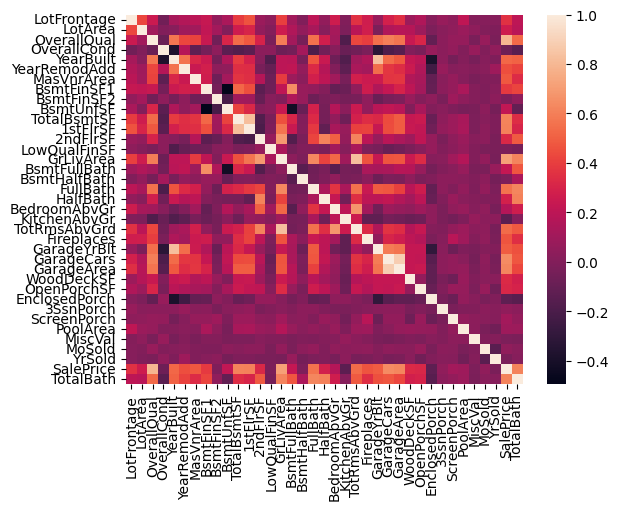

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
corr = df_numeric.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Numerics

In [8]:
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'TotalBath'],
      dtype='object')

Correlation with target variable: 0.3517990965706778


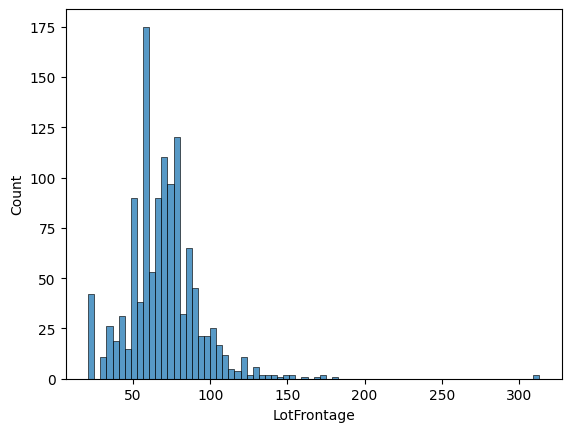

In [9]:
tgt = 'SalePrice'
col = 'LotFrontage'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.3517990965706778


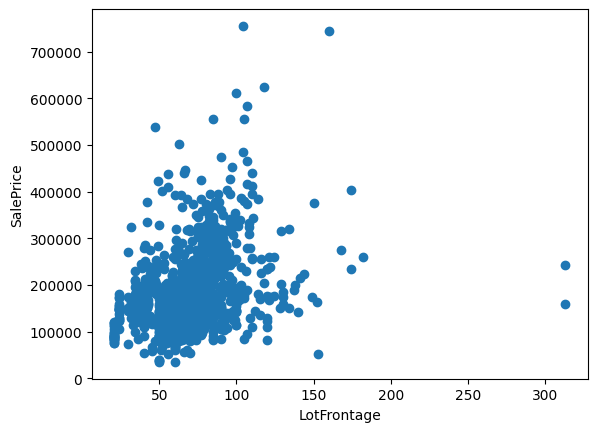

In [10]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.2638433538714056


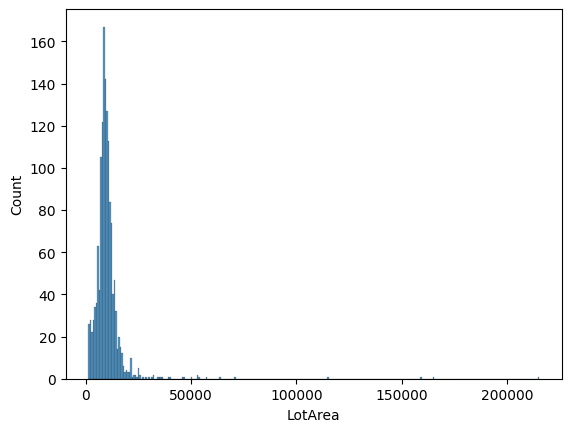

In [11]:
col = 'LotArea'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.2638433538714056


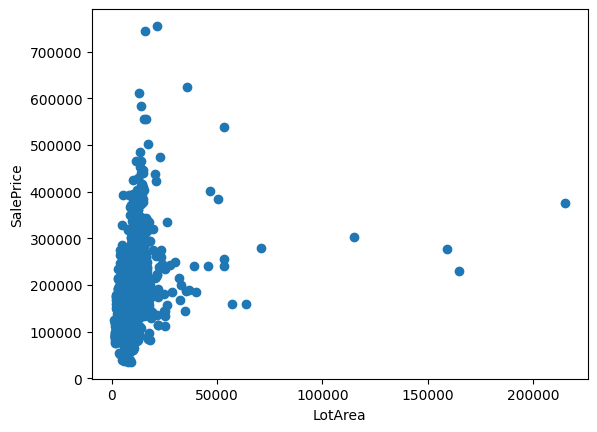

In [12]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.4774930470957156


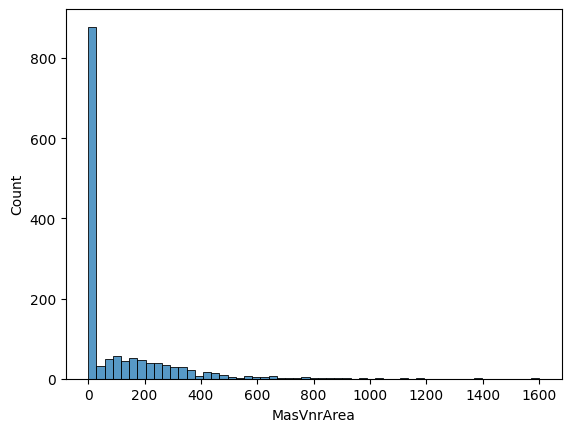

In [13]:
col = 'MasVnrArea'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.4774930470957156


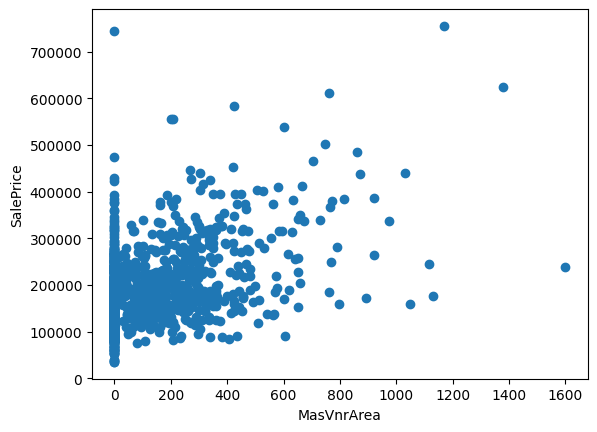

In [14]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.3864198062421533


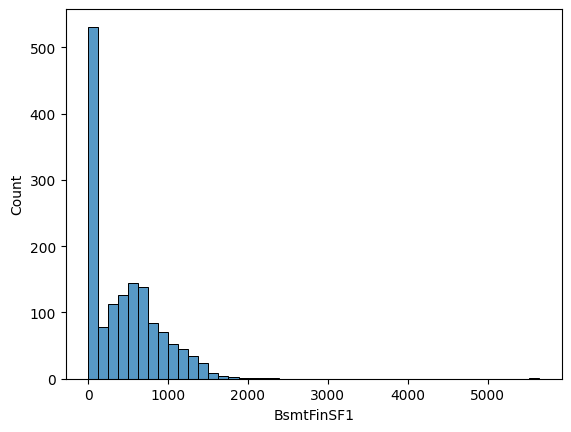

In [15]:
col = 'BsmtFinSF1'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.3864198062421533


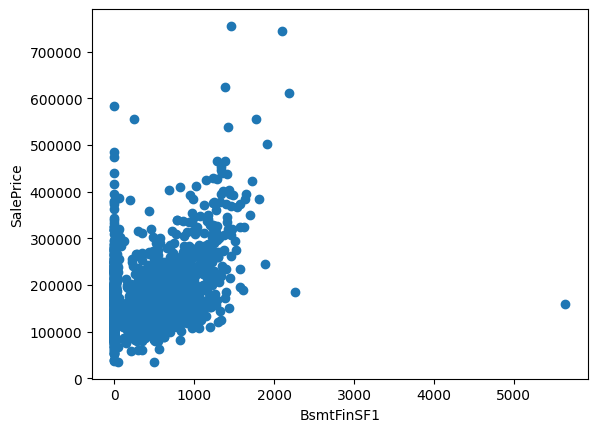

In [16]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: -0.011378121450215144


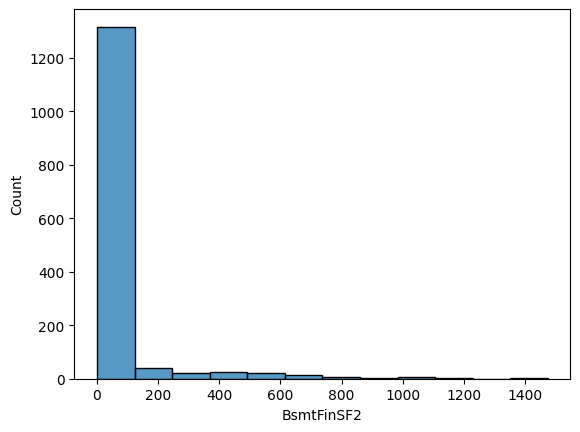

In [17]:
col = 'BsmtFinSF2'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: -0.011378121450215144


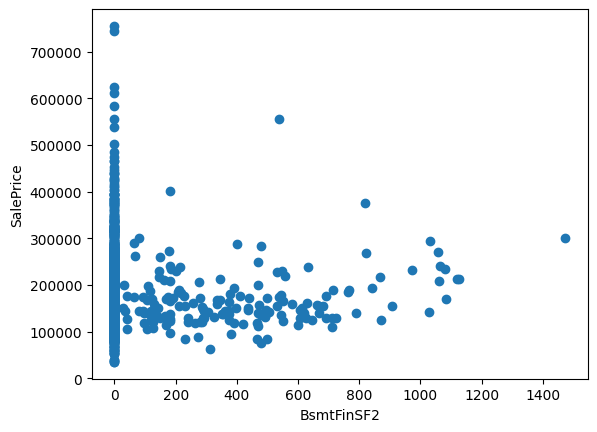

In [18]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.21447910554696892


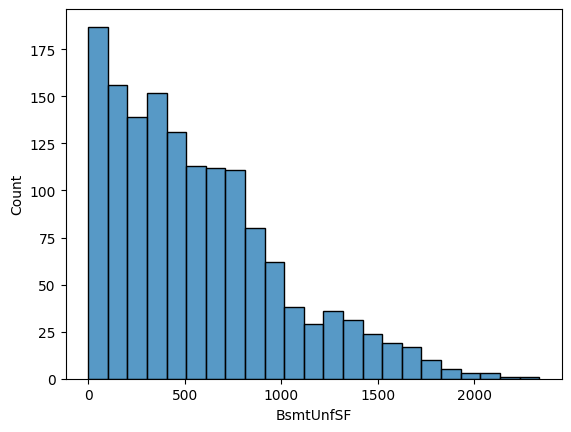

In [19]:
col = 'BsmtUnfSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.6135805515591953


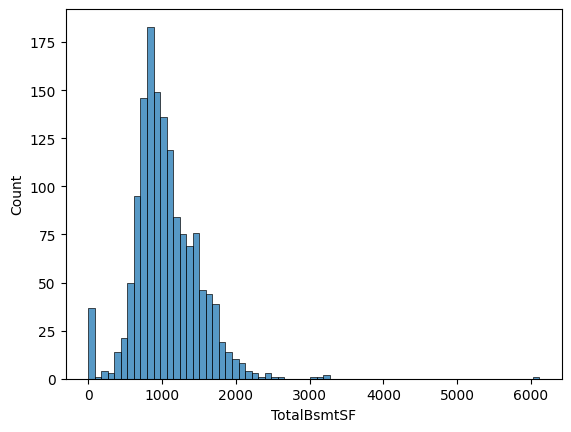

In [20]:
col = 'TotalBsmtSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.6135805515591953


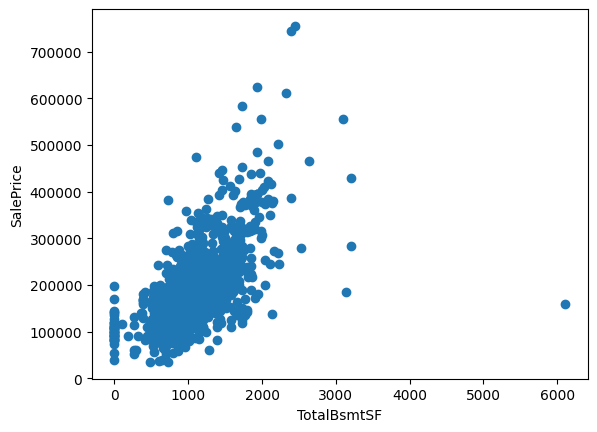

In [21]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.6058521846919149


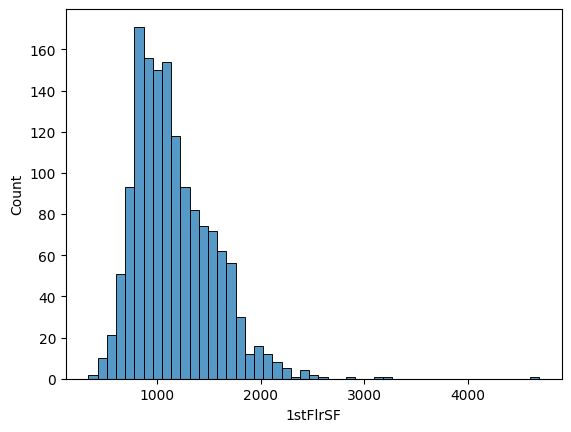

In [22]:
col = '1stFlrSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.6058521846919149


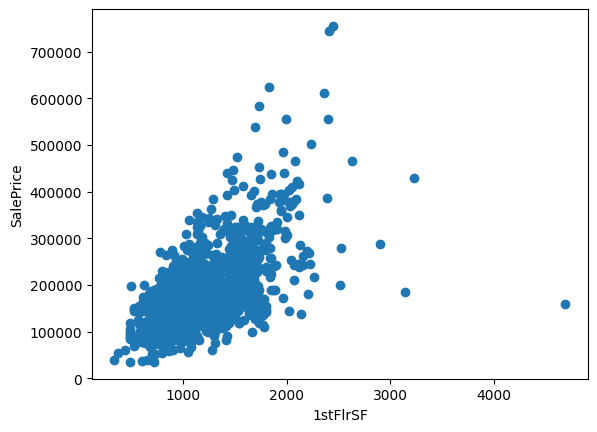

In [23]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.31933380283206786


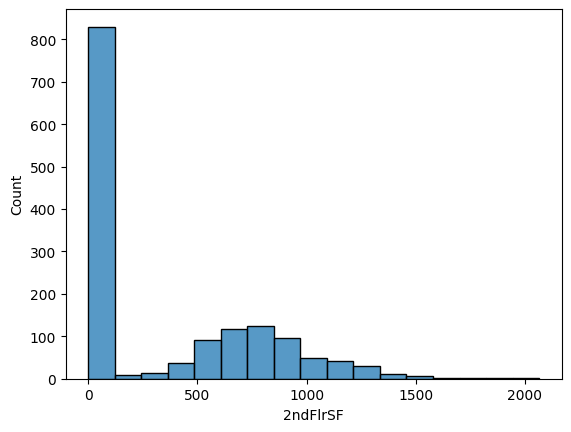

In [24]:
col = '2ndFlrSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.31933380283206786


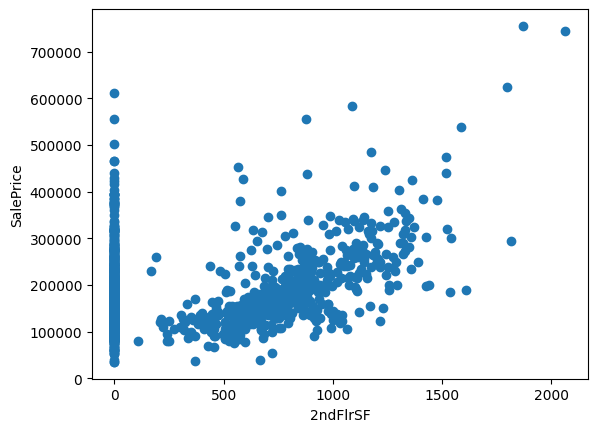

In [25]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: -0.025606130000679538


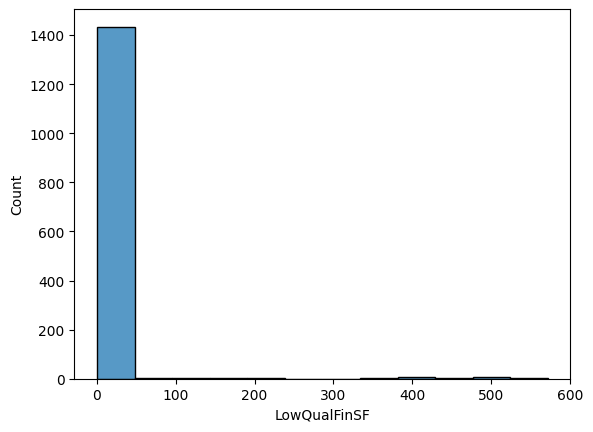

In [26]:
col = 'LowQualFinSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: -0.025606130000679538


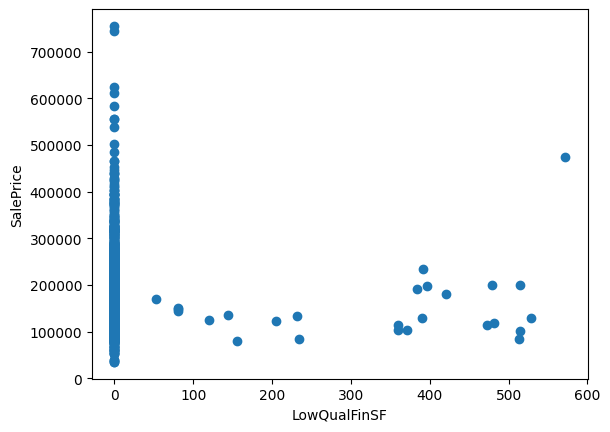

In [27]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.7086244776126523


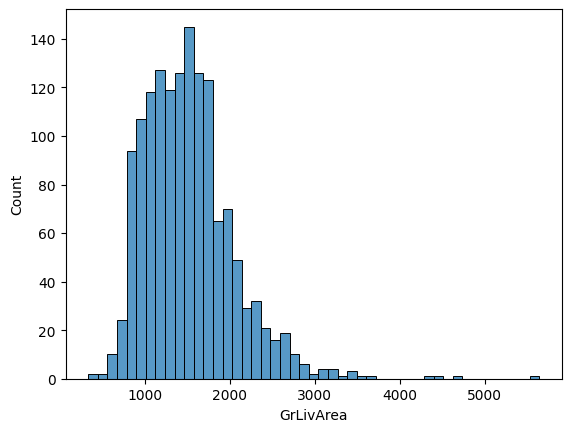

In [28]:
col = 'GrLivArea'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.7086244776126523


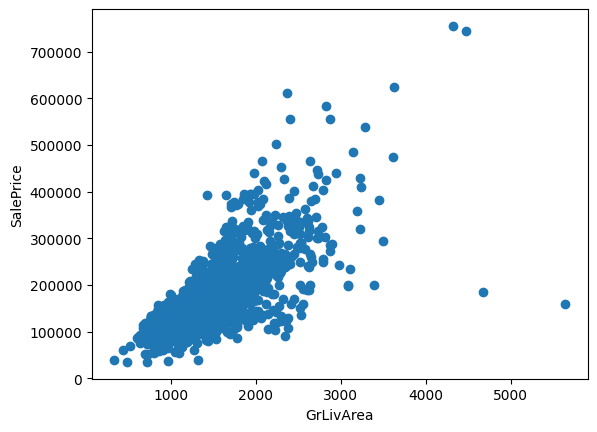

In [29]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.6234314389183618


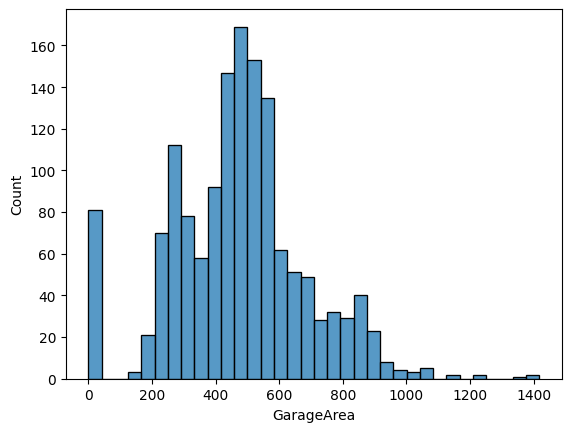

In [30]:
col = 'GarageArea'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.6234314389183618


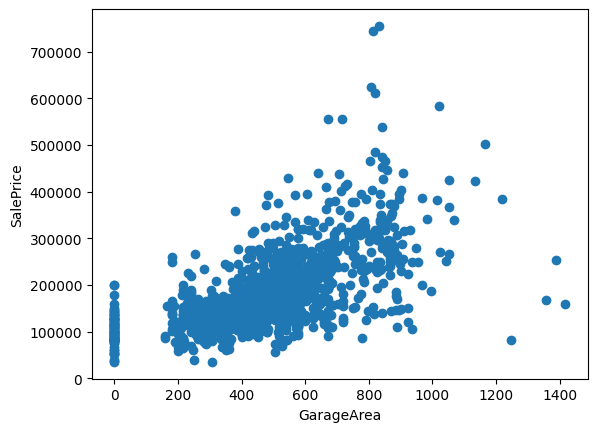

In [31]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.3244134445681298


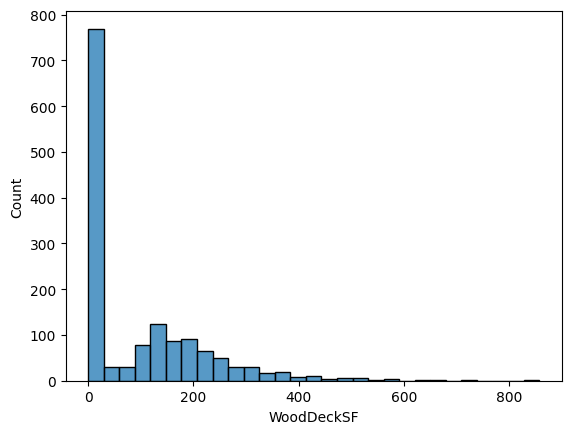

In [32]:
col = 'WoodDeckSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.3244134445681298


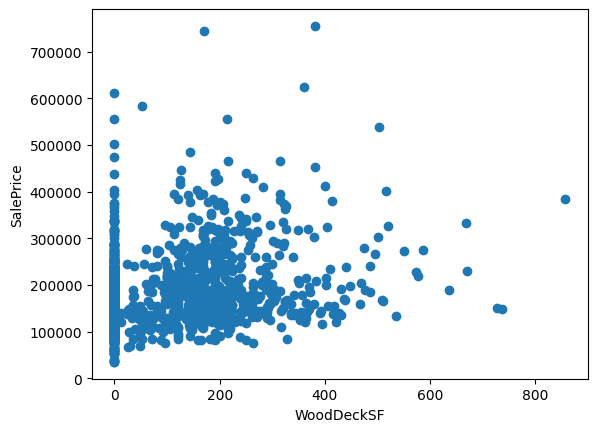

In [33]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.31585622711605527


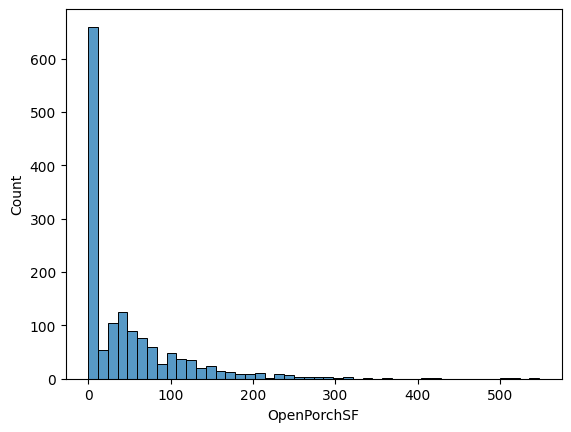

In [34]:
col = 'OpenPorchSF'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.31585622711605527


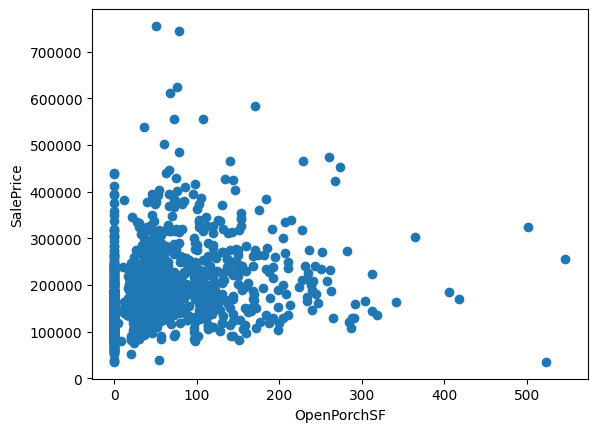

In [35]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: -0.12857795792595678


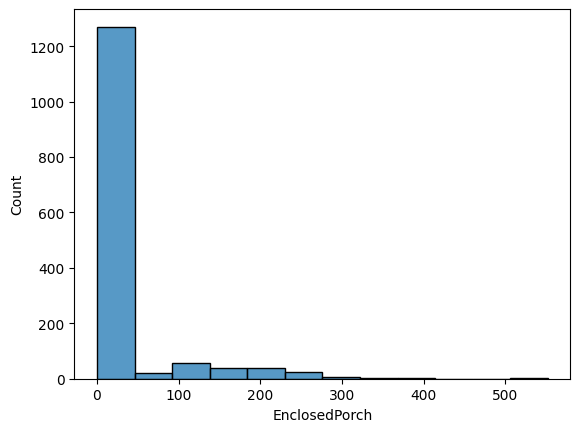

In [36]:
col = 'EnclosedPorch'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: -0.12857795792595678


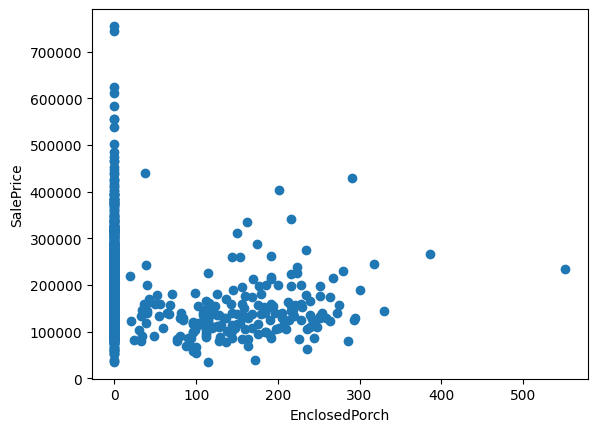

In [37]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.04458366533574841


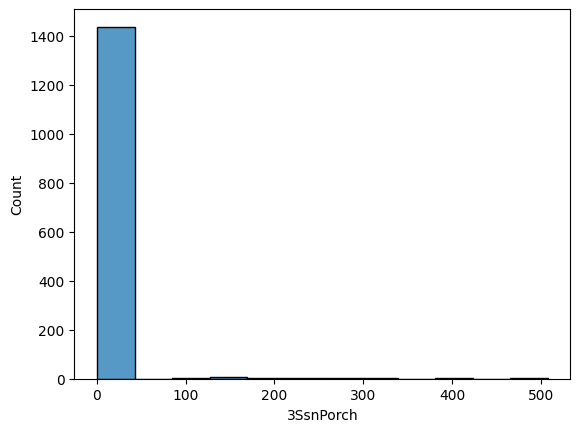

In [38]:
col = '3SsnPorch'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.04458366533574841


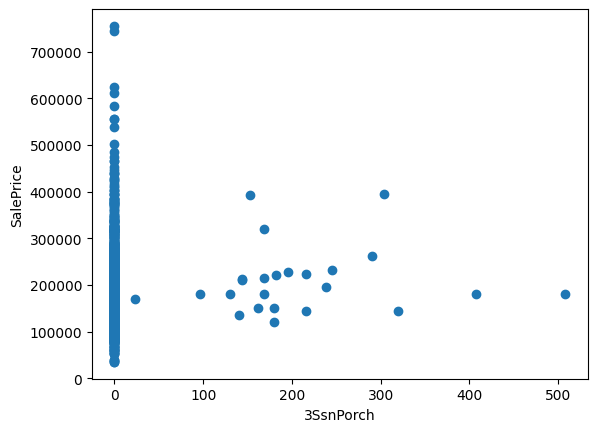

In [39]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.1114465711429112


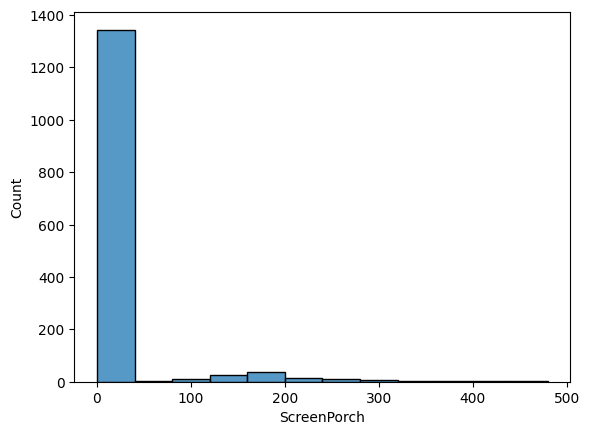

In [40]:
col = 'ScreenPorch'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.1114465711429112


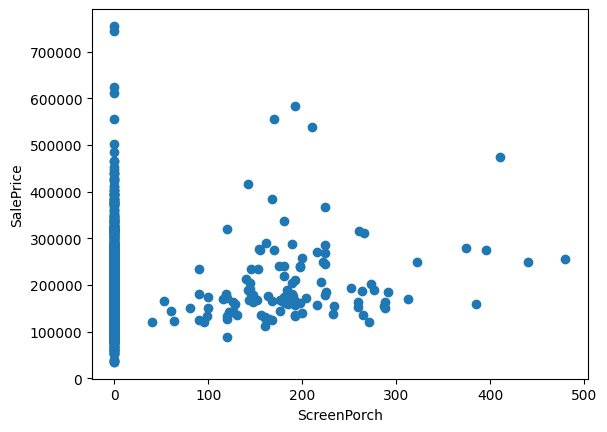

In [41]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 0.09240354949187322


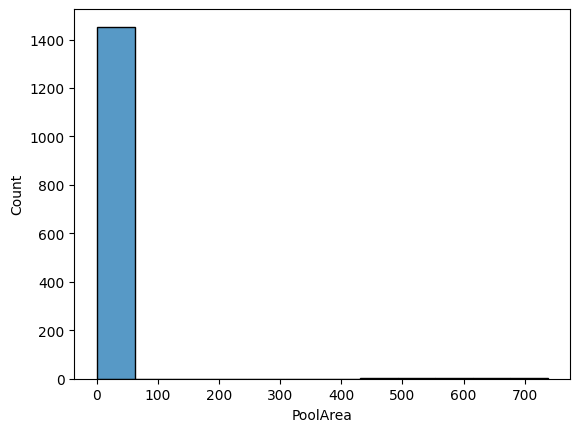

In [42]:
col = 'PoolArea'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 0.09240354949187322


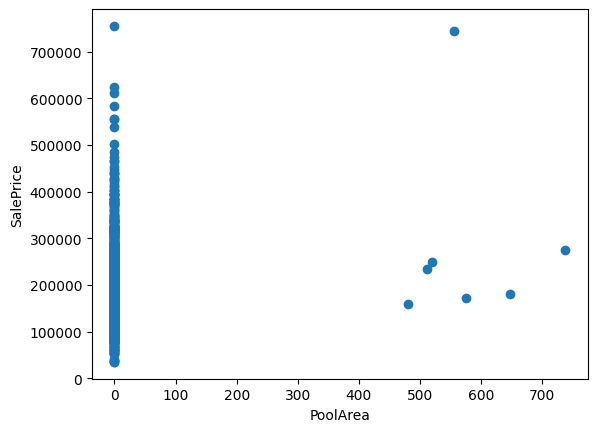

In [43]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: -0.021189579640303262


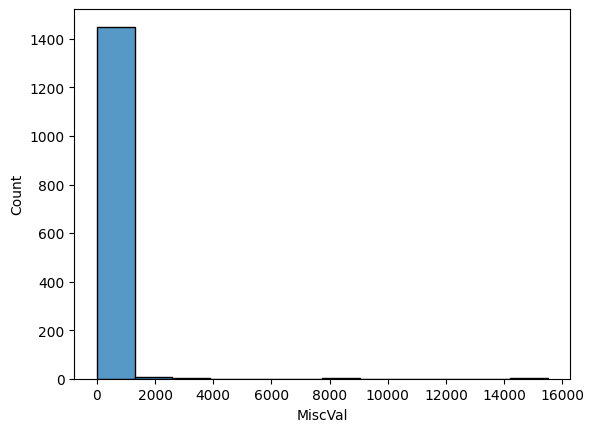

In [44]:
col = 'MiscVal'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: -0.021189579640303262


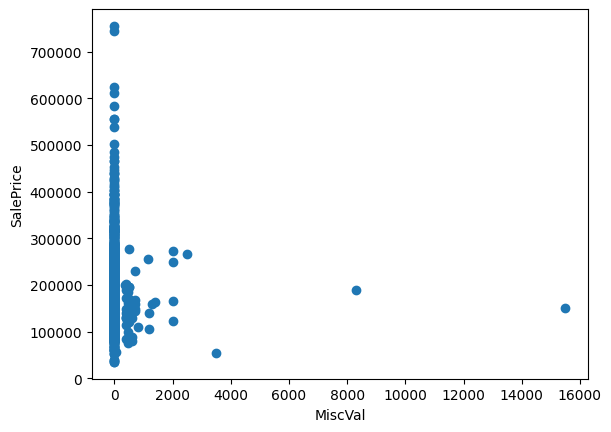

In [45]:
scatterplot(df_numeric, col, tgt)

Correlation with target variable: 1.0


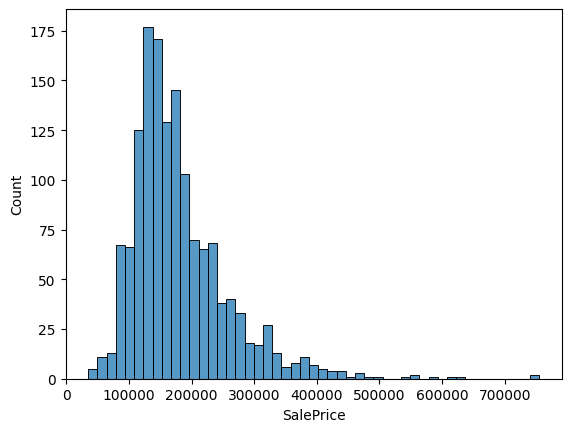

In [46]:
col = 'SalePrice'
plot_histogram(df_numeric, col, tgt)

Correlation with target variable: 1.0


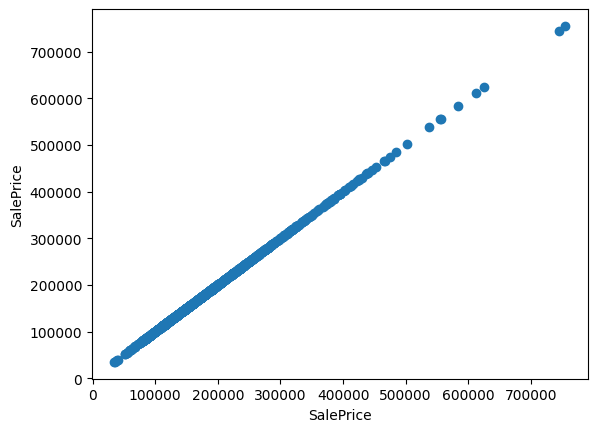

In [47]:
scatterplot(df_numeric, col, tgt)

# Ordinals

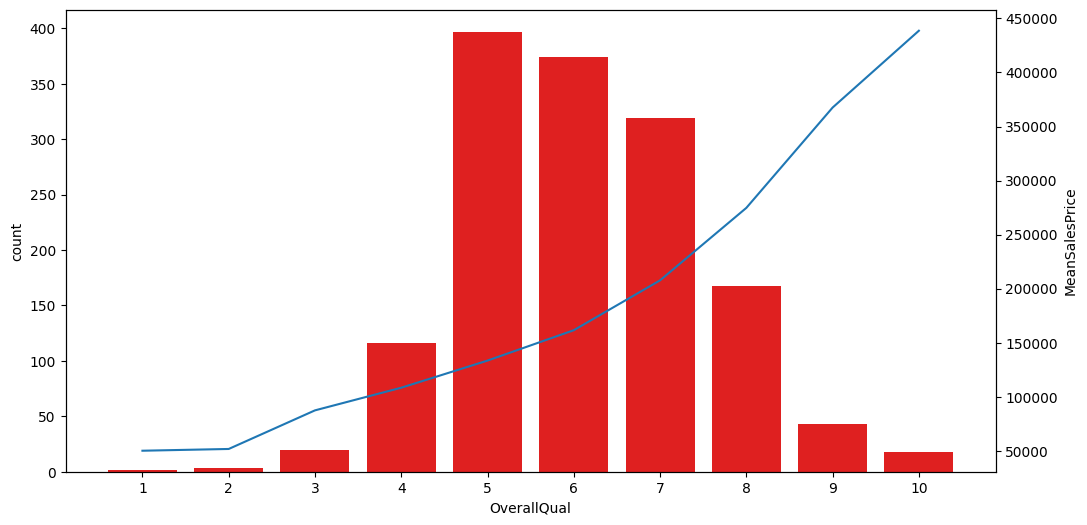

In [48]:
group = 'OverallQual'
ordinal_plot(df, group)

Correlation with target variable: 0.790981600583805


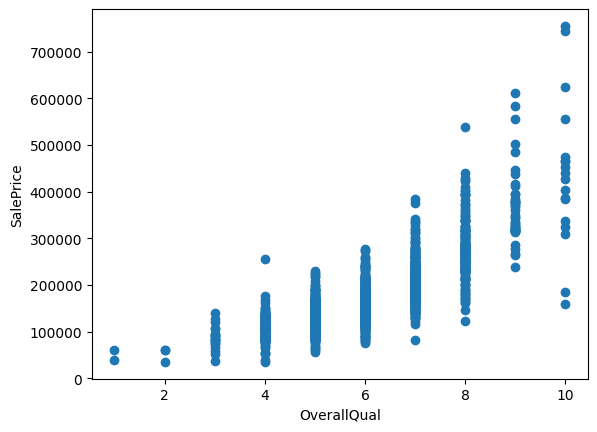

In [49]:
scatterplot(df, group, tgt)

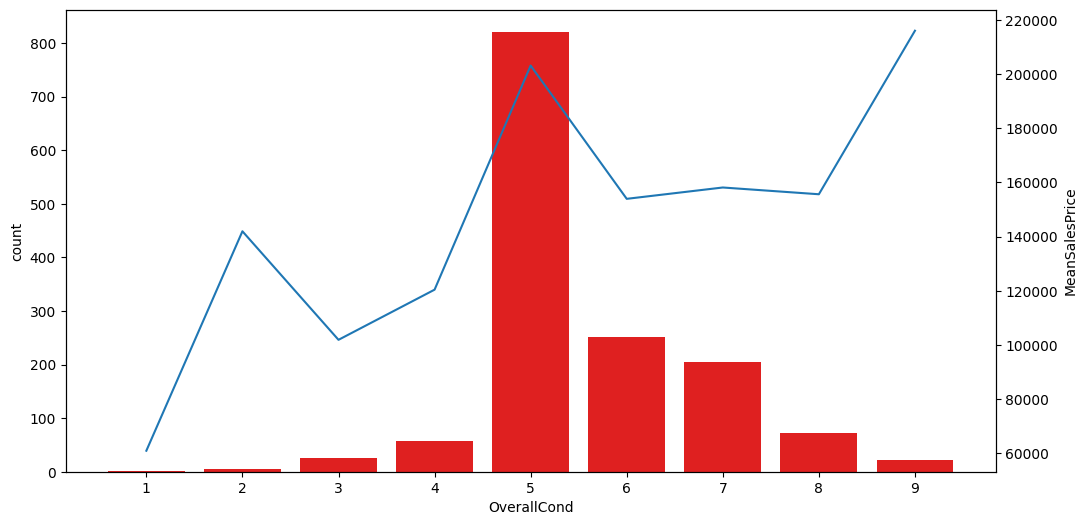

In [50]:
group = 'OverallCond'
ordinal_plot(df, group)

Correlation with target variable: -0.07785589404867806


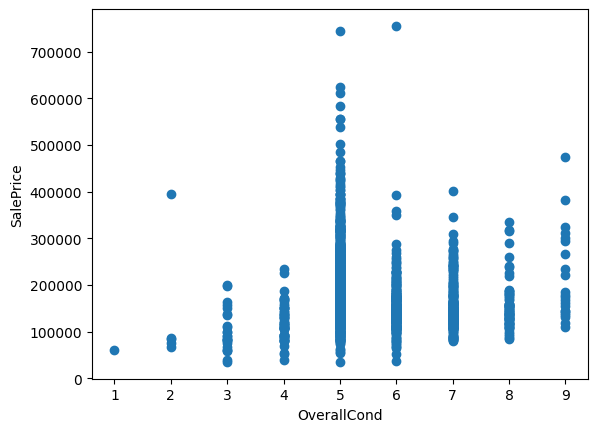

In [51]:
scatterplot(df, group, tgt)

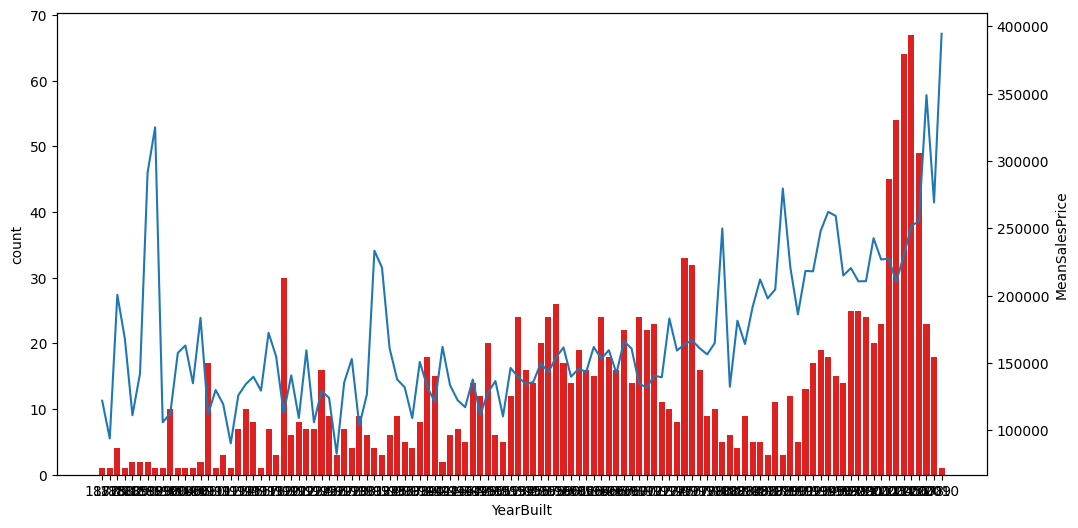

In [52]:
group = 'YearBuilt'
ordinal_plot(df, group)

Correlation with target variable: 0.5228973328794971


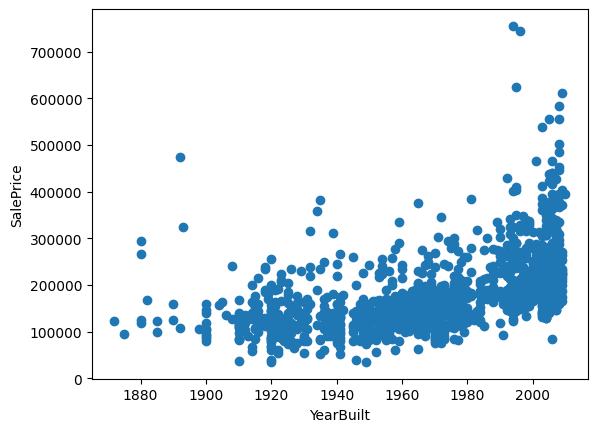

In [53]:
scatterplot(df, group, tgt)

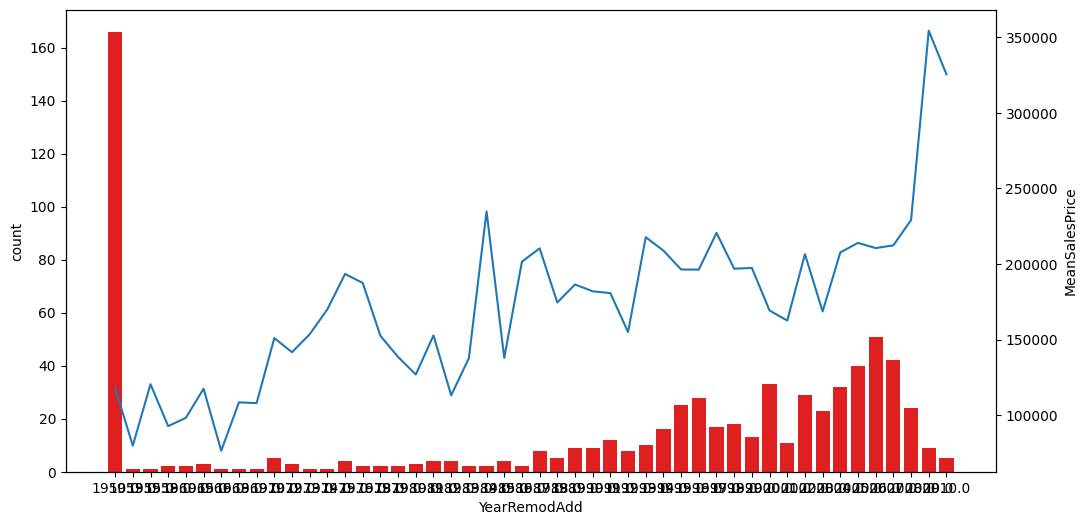

In [54]:
group = 'YearRemodAdd'
ordinal_plot(df, group)

Correlation with target variable: 0.4457476913525237


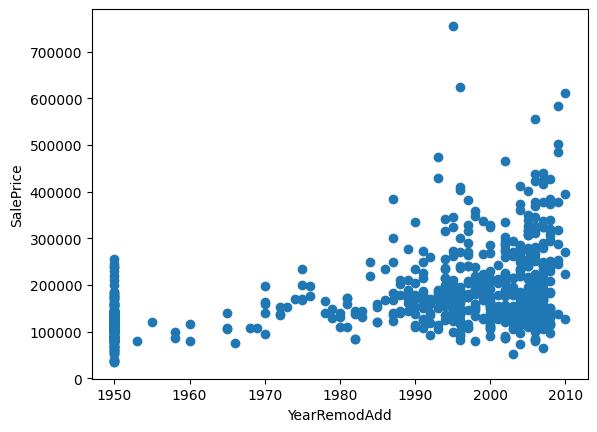

In [55]:
scatterplot(df, group, tgt)

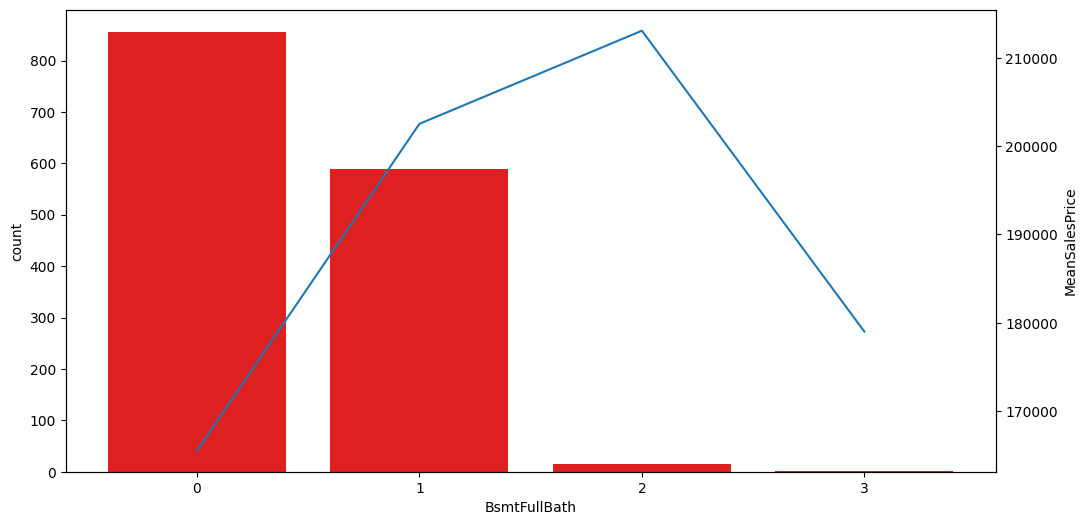

In [56]:
group = 'BsmtFullBath'
ordinal_plot(df, group)

Correlation with target variable: 0.22712223313149427


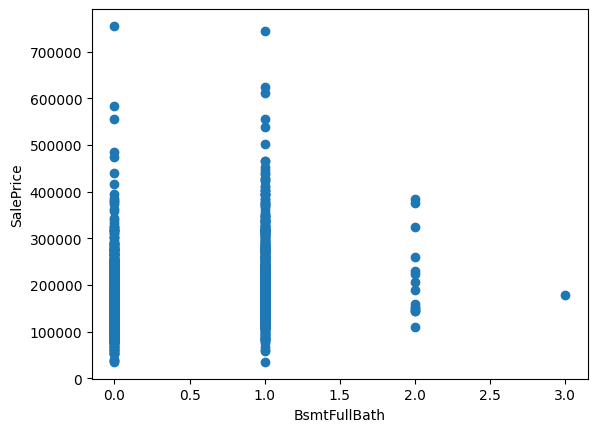

In [57]:
scatterplot(df, group, tgt)

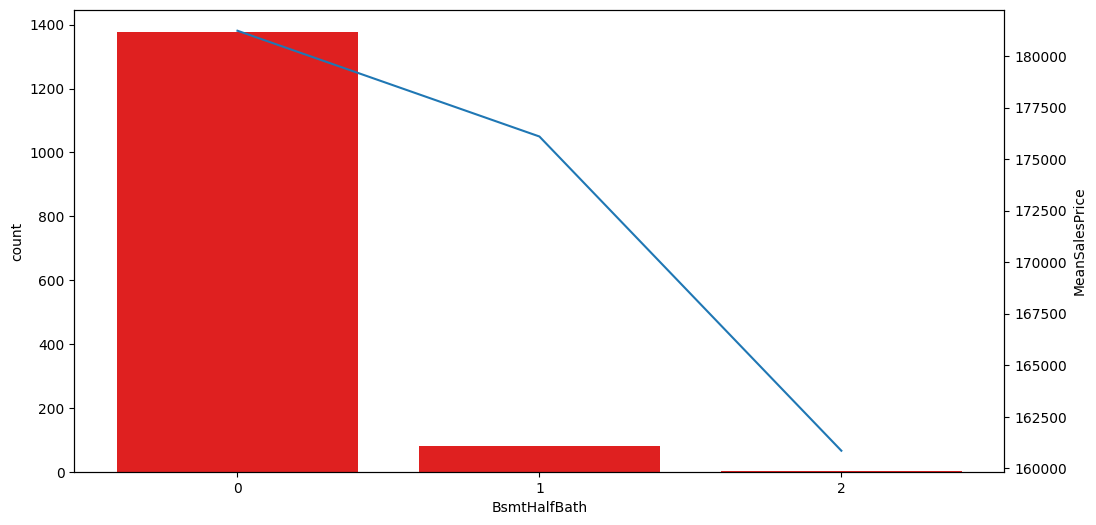

In [58]:
group = 'BsmtHalfBath'
ordinal_plot(df, group)

Correlation with target variable: -0.016844154297359016


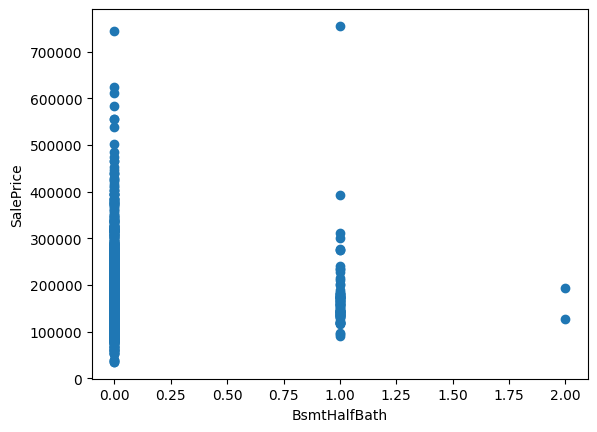

In [59]:
scatterplot(df, group, tgt)

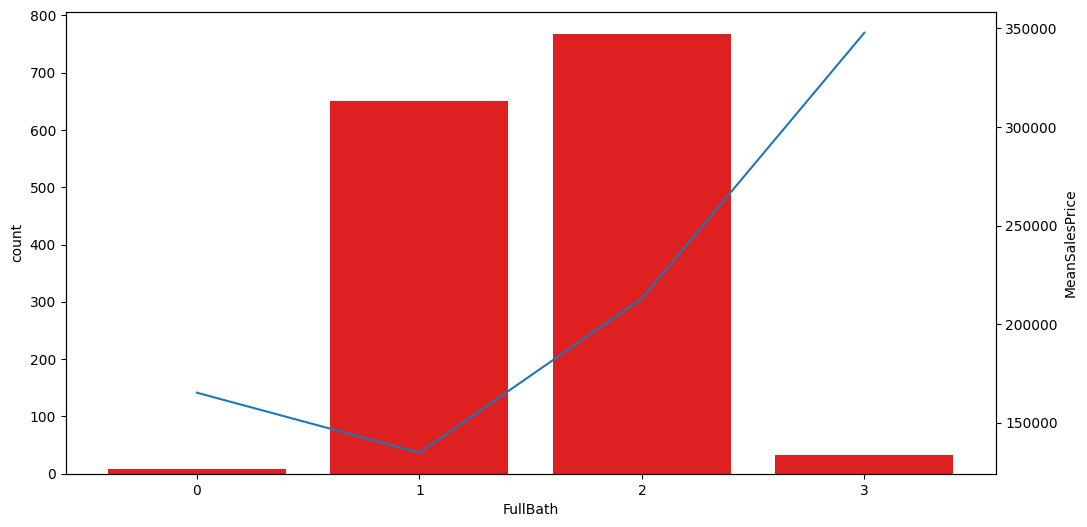

In [60]:
group = 'FullBath'
ordinal_plot(df, group)

Correlation with target variable: 0.5606637627484461


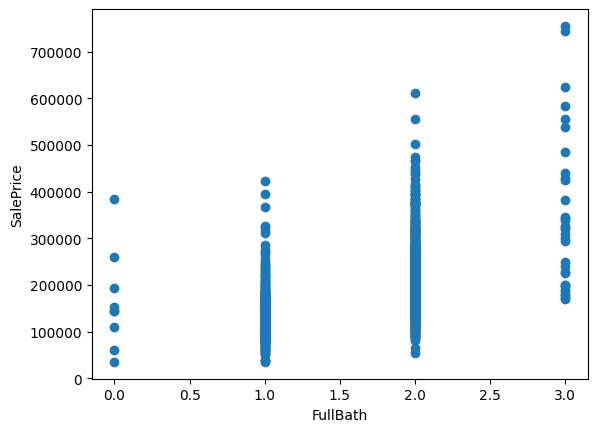

In [61]:
scatterplot(df, group, tgt)

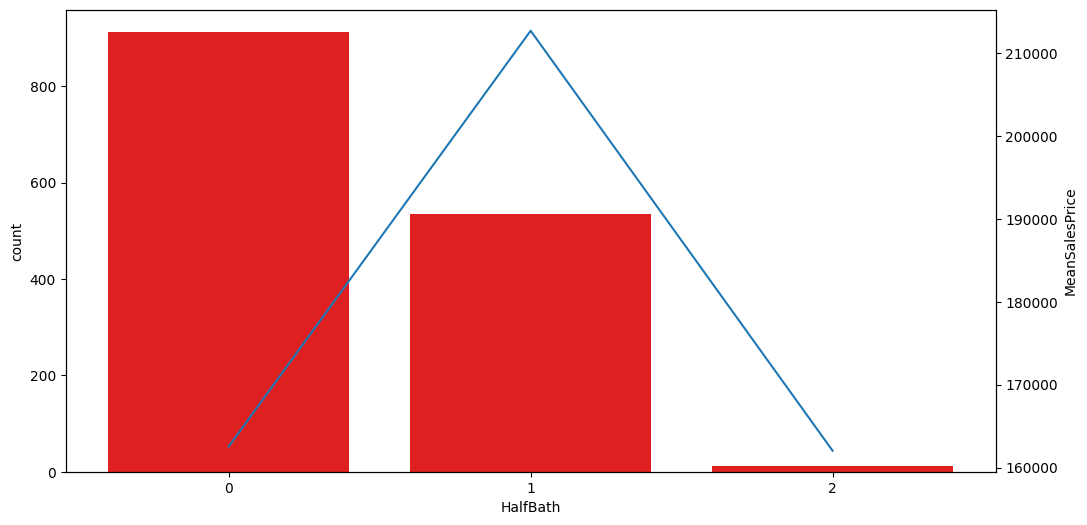

In [62]:
group = 'HalfBath'
ordinal_plot(df, group)

Correlation with target variable: 0.28410767559478267


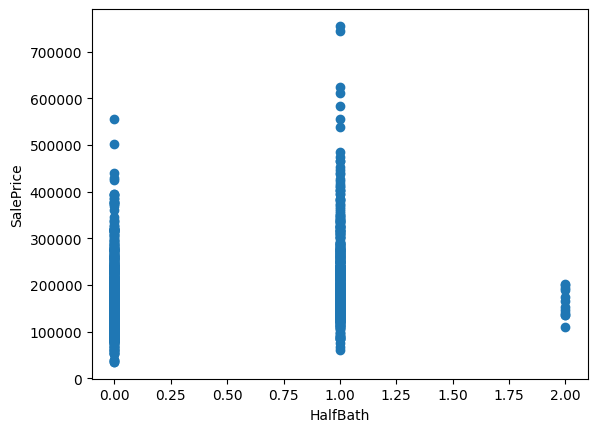

In [63]:
scatterplot(df, group, tgt)

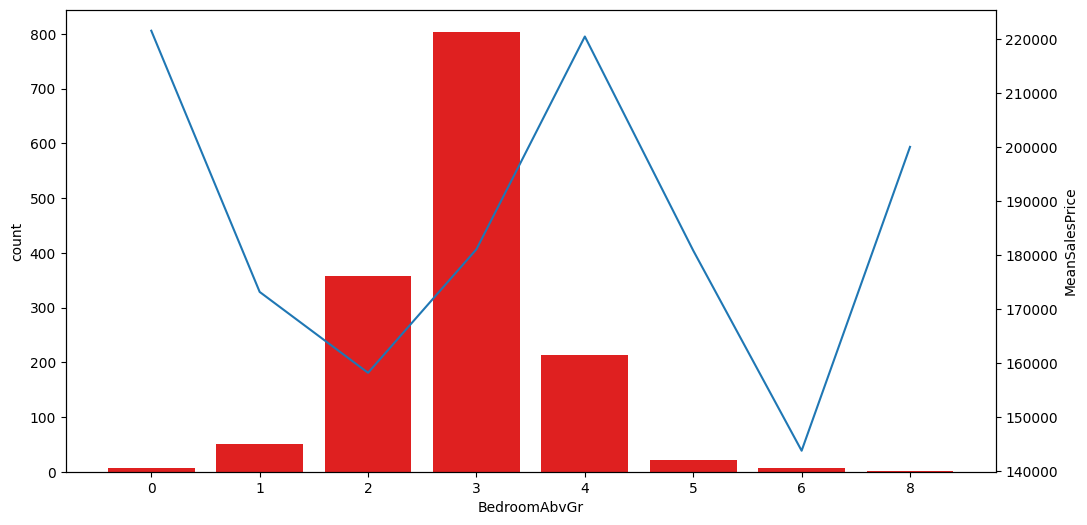

In [64]:
group = 'BedroomAbvGr'
ordinal_plot(df, group)

Correlation with target variable: 0.16821315430074005


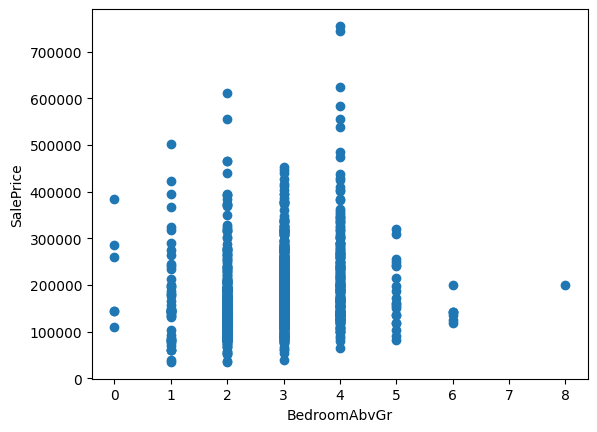

In [65]:
scatterplot(df, group, tgt)

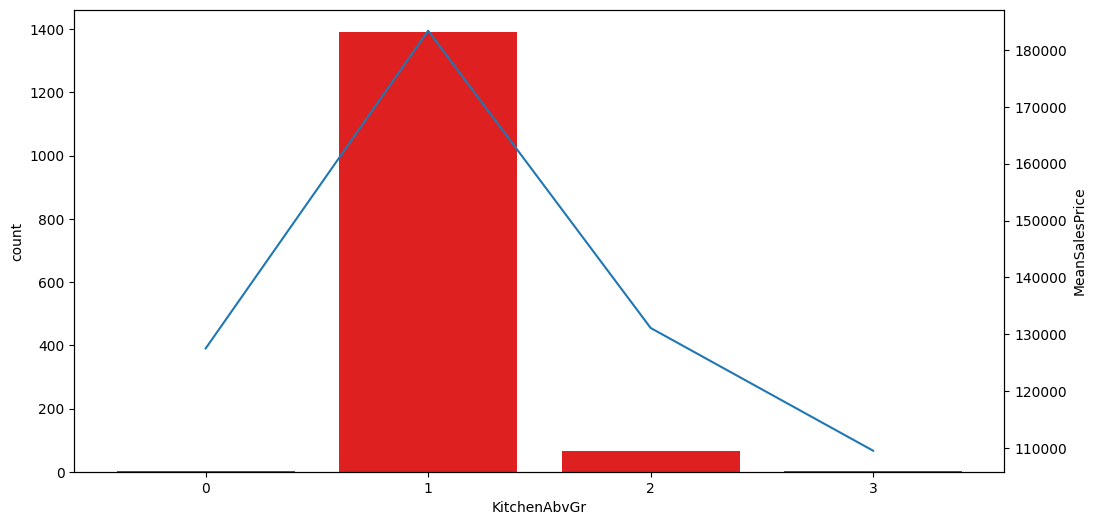

In [66]:
group = 'KitchenAbvGr'
ordinal_plot(df, group)

Correlation with target variable: -0.13590737084214125


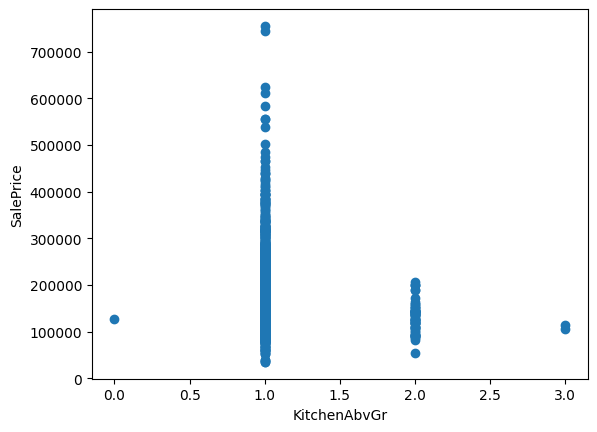

In [67]:
scatterplot(df, group, tgt)

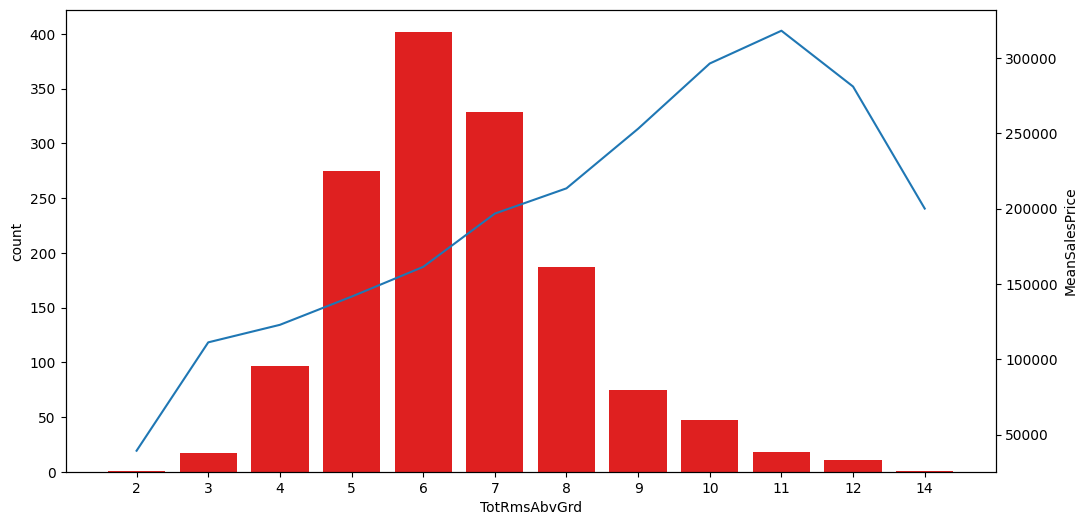

In [68]:
group = 'TotRmsAbvGrd'
ordinal_plot(df, group)

Correlation with target variable: 0.5337231555820283


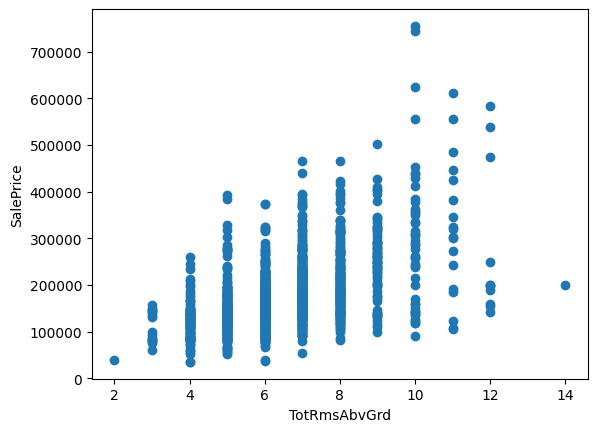

In [69]:
scatterplot(df, group, tgt)

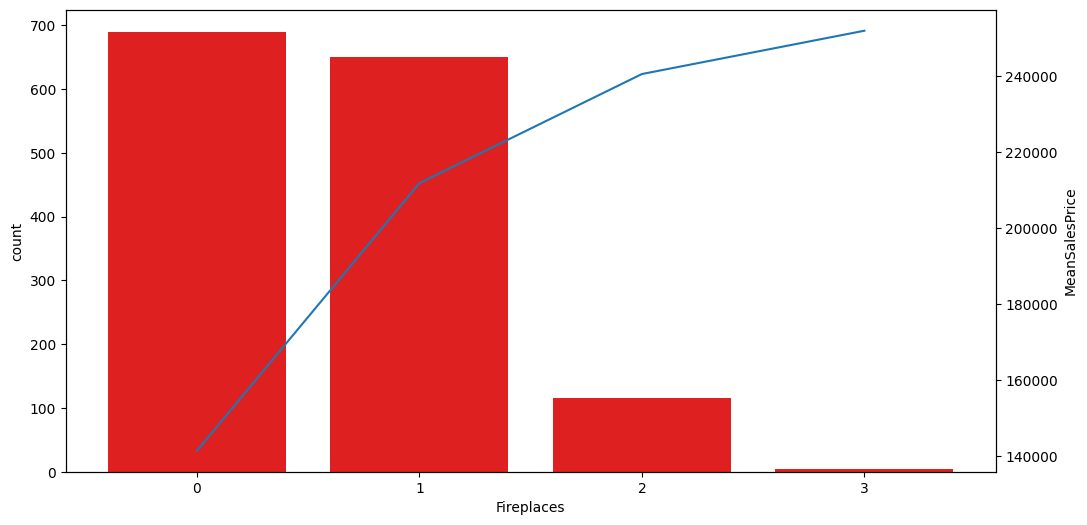

In [70]:
group = 'Fireplaces'
ordinal_plot(df, group)

Correlation with target variable: 0.4669288367515278


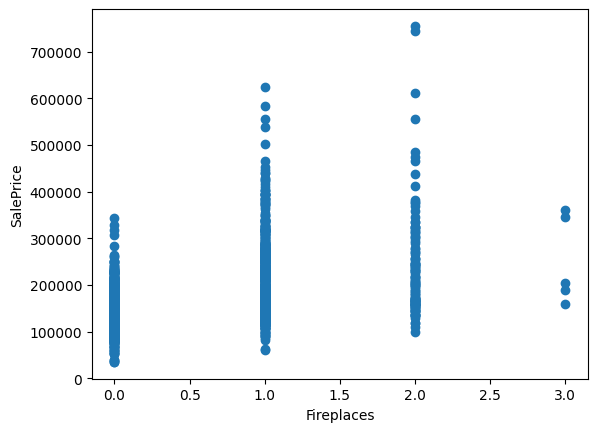

In [71]:
scatterplot(df, group, tgt)

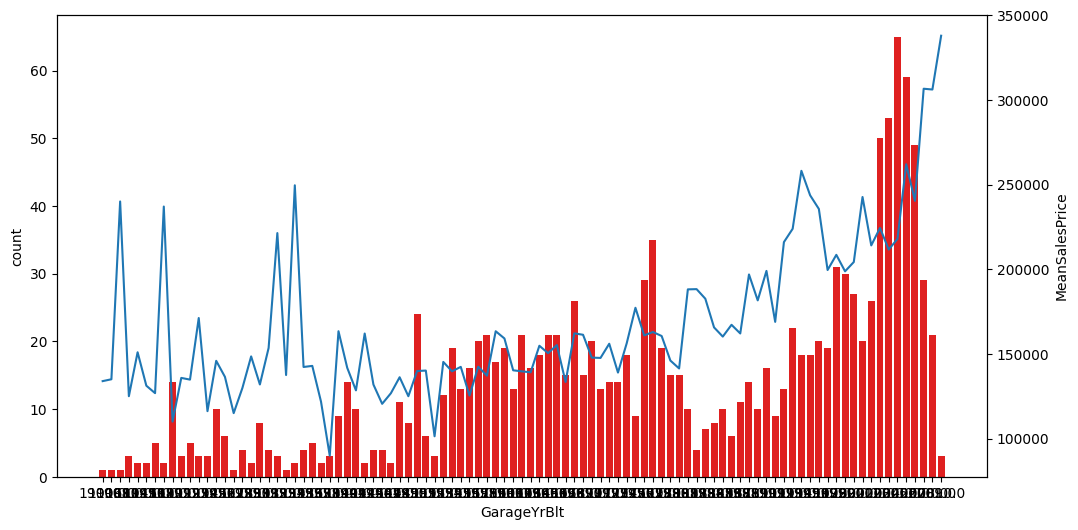

In [72]:
group = 'GarageYrBlt'
ordinal_plot(df, group)

Correlation with target variable: 0.48636167748786097


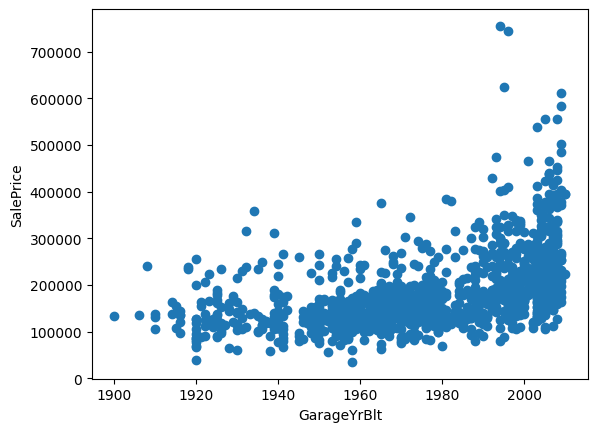

In [73]:
scatterplot(df, group, tgt)

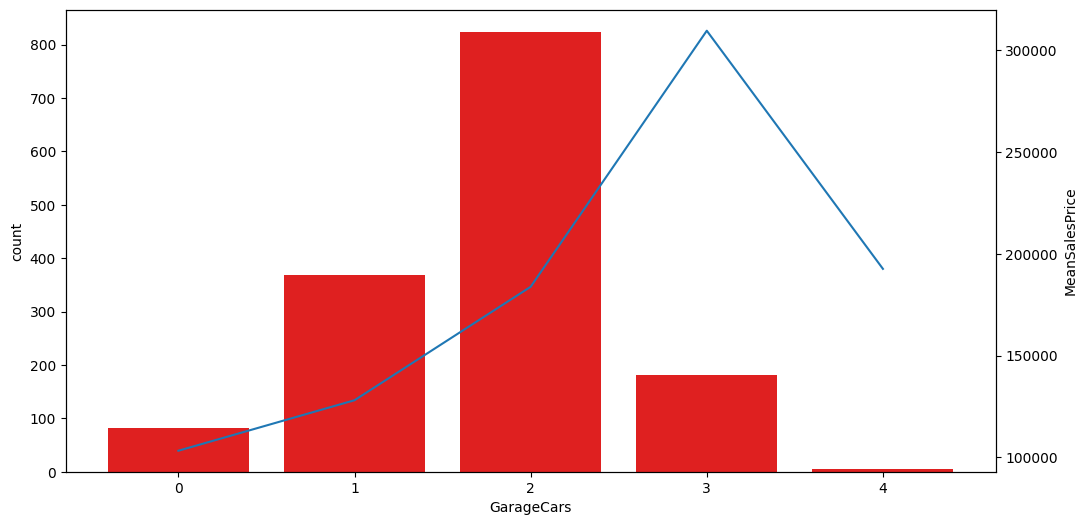

In [74]:
group = 'GarageCars'
ordinal_plot(df, group)

Correlation with target variable: 0.6404091972583521


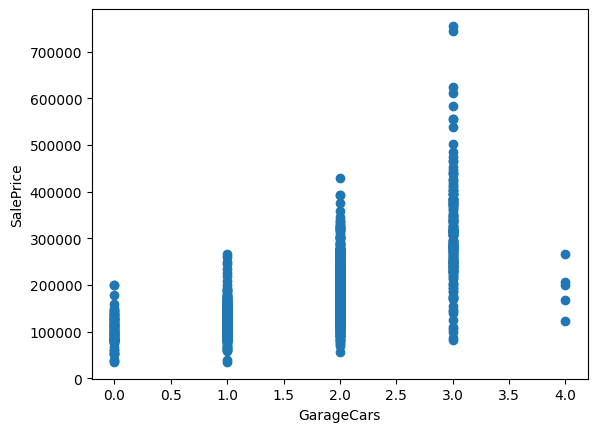

In [75]:
scatterplot(df, group, tgt)

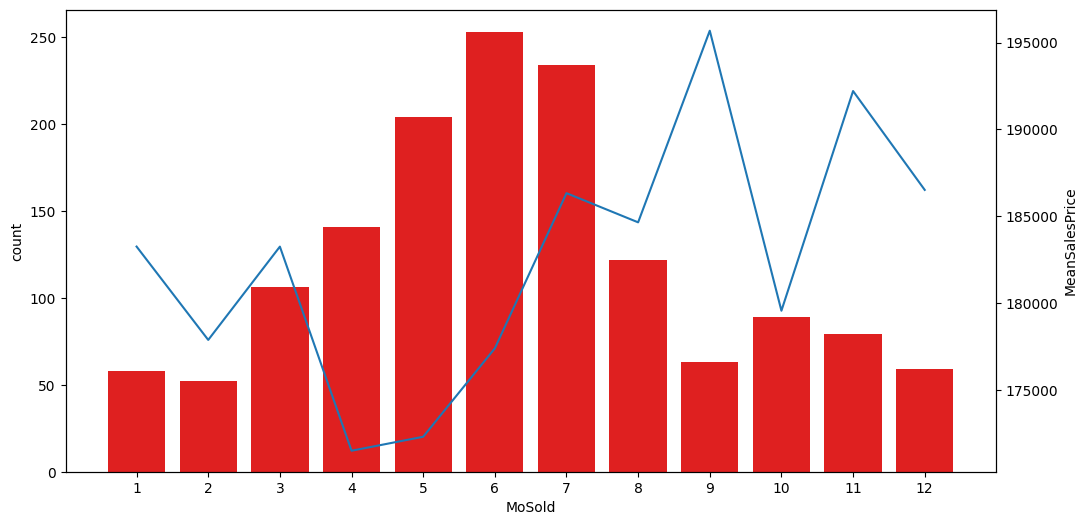

In [76]:
group = 'MoSold'
ordinal_plot(df, group)

Correlation with target variable: 0.04643224522381934


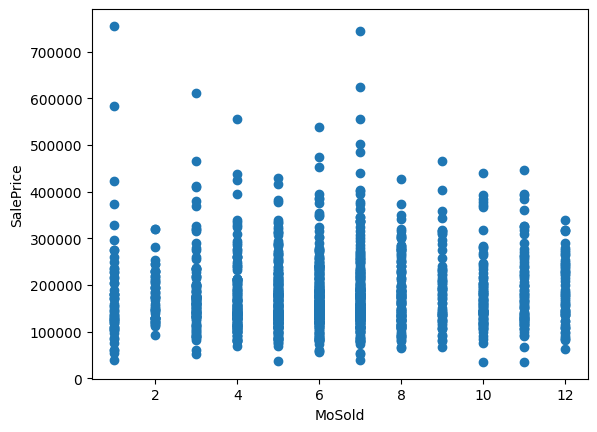

In [77]:
scatterplot(df, group, tgt)

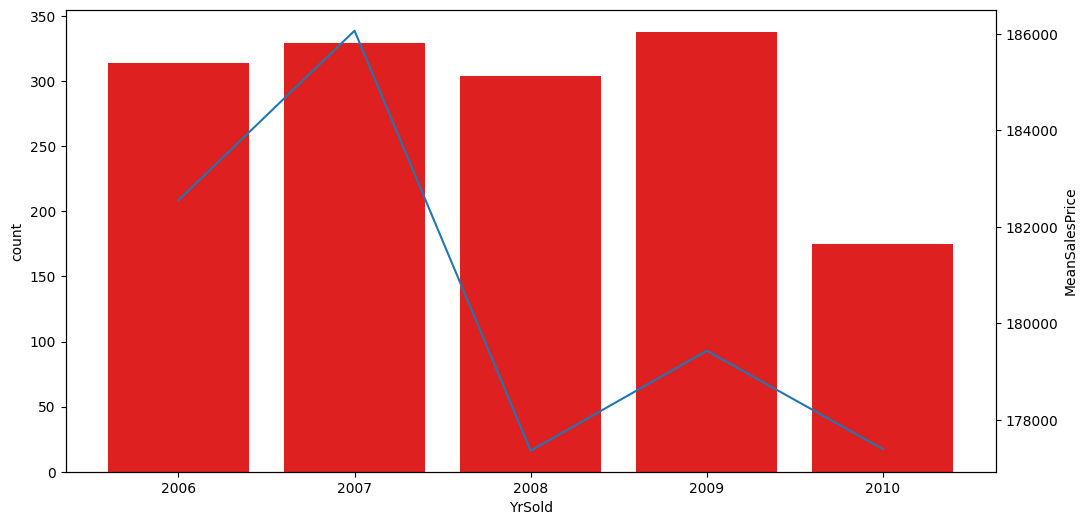

In [78]:
group = 'YrSold'
ordinal_plot(df, group)

Correlation with target variable: -0.028922585168730326


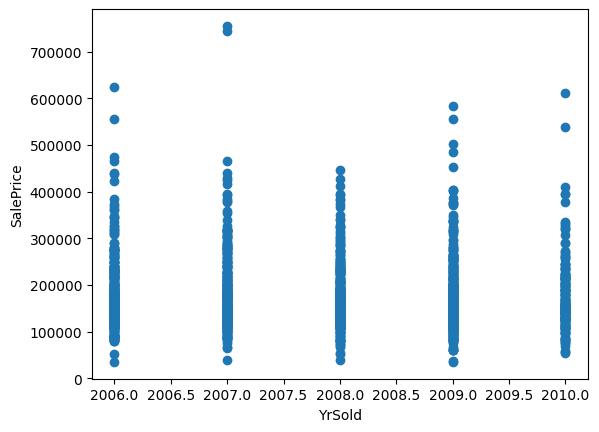

In [79]:
scatterplot(df, group, tgt)

# Categoricals

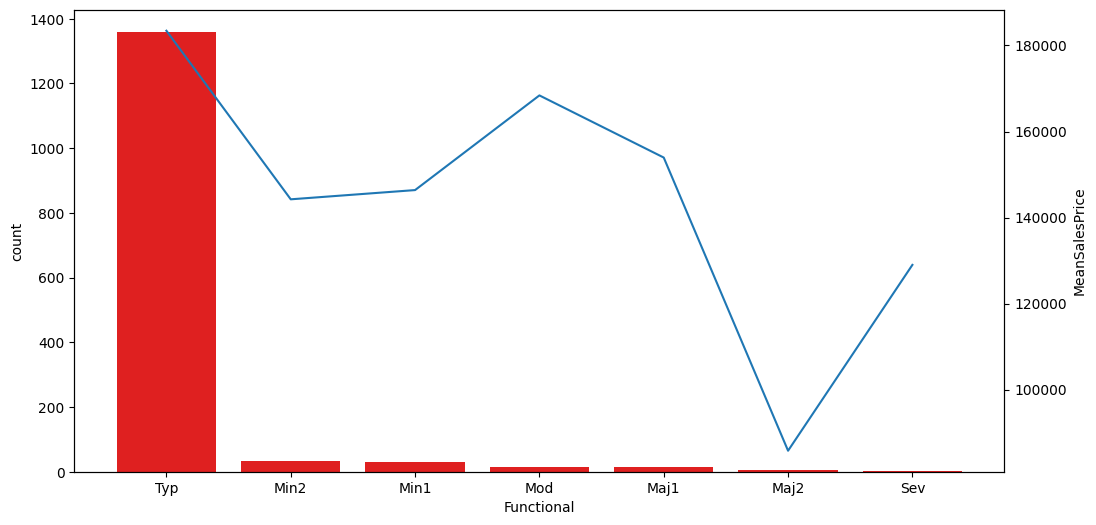

In [80]:
group = 'Functional'
categorical_plot(df, group)

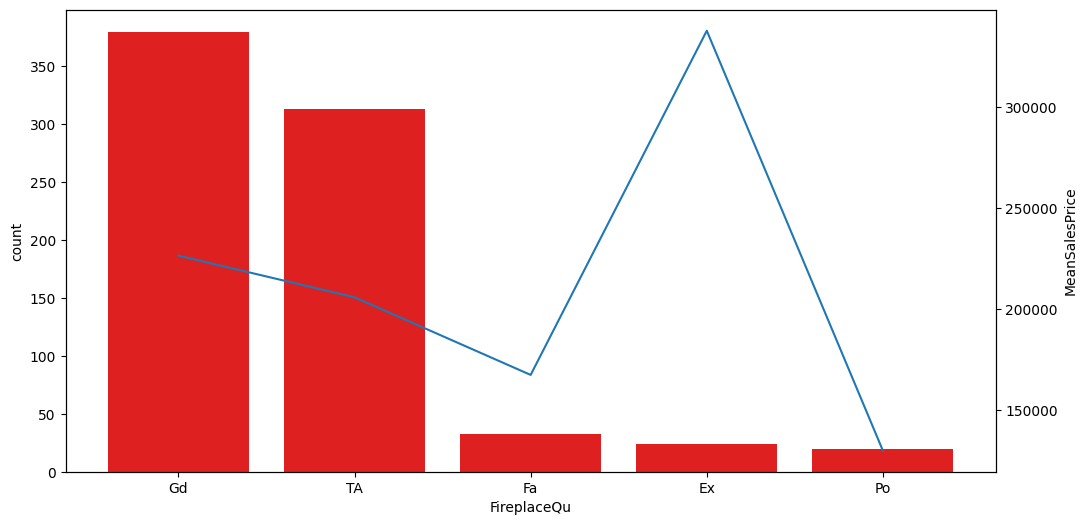

In [81]:
group = 'FireplaceQu'
categorical_plot(df, group)

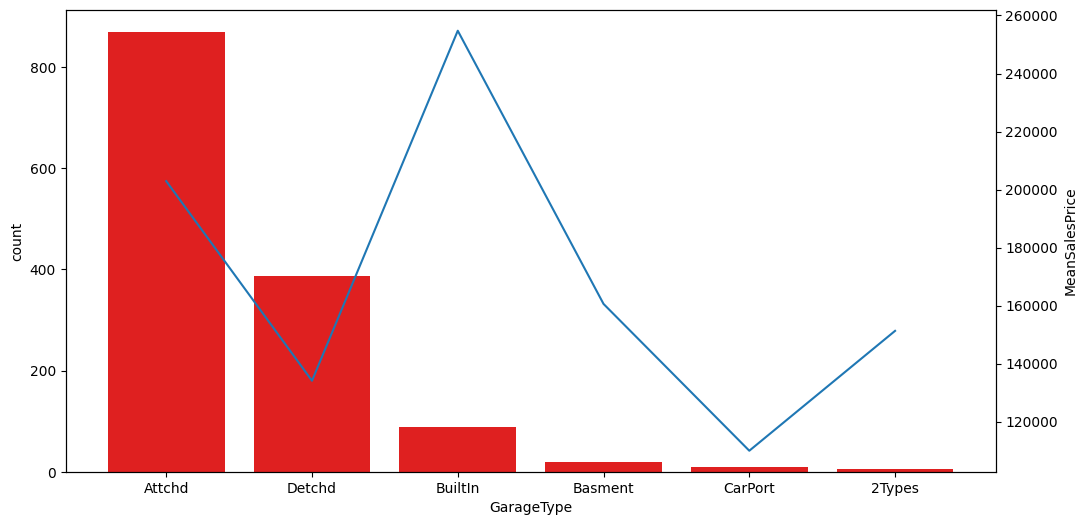

In [82]:
group = 'GarageType'
categorical_plot(df, group)

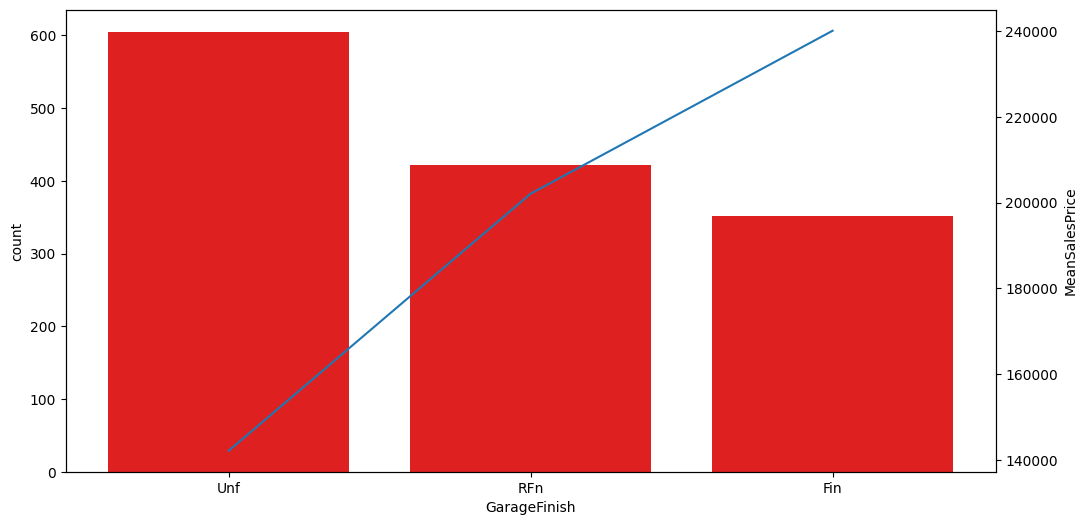

In [83]:
group = 'GarageFinish'
categorical_plot(df, group)

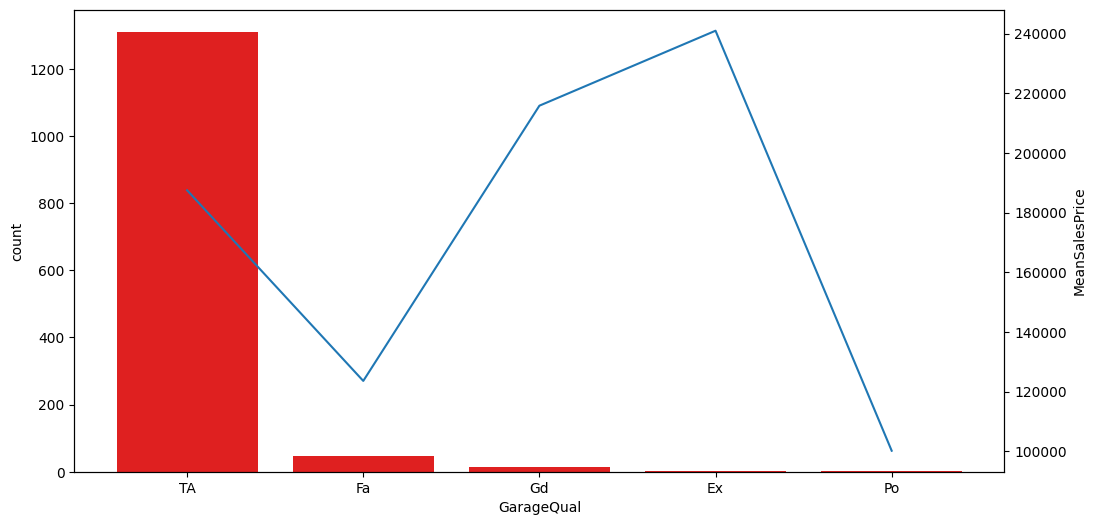

In [84]:
group = 'GarageQual'
categorical_plot(df, group)

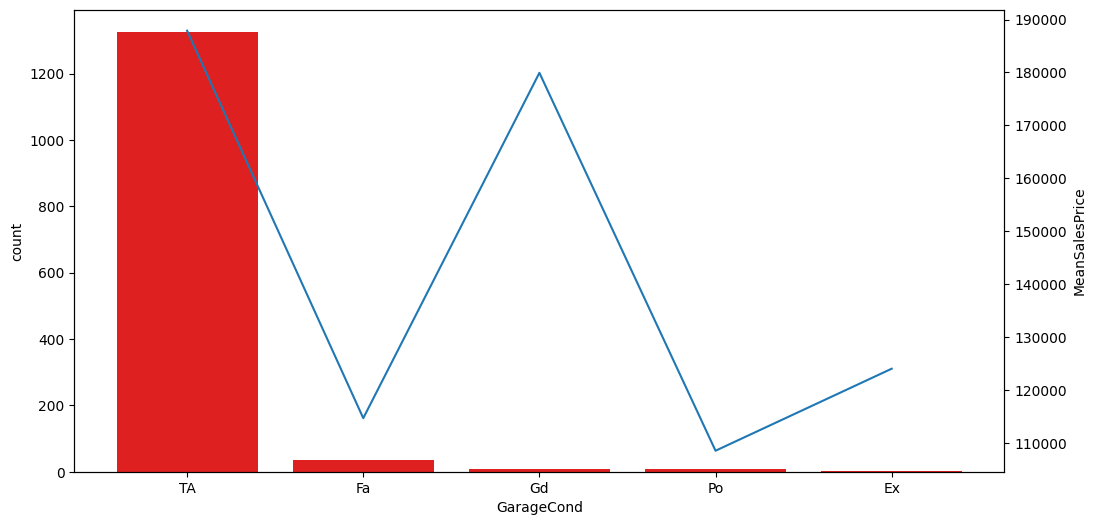

In [85]:
group = 'GarageCond'
categorical_plot(df, group)

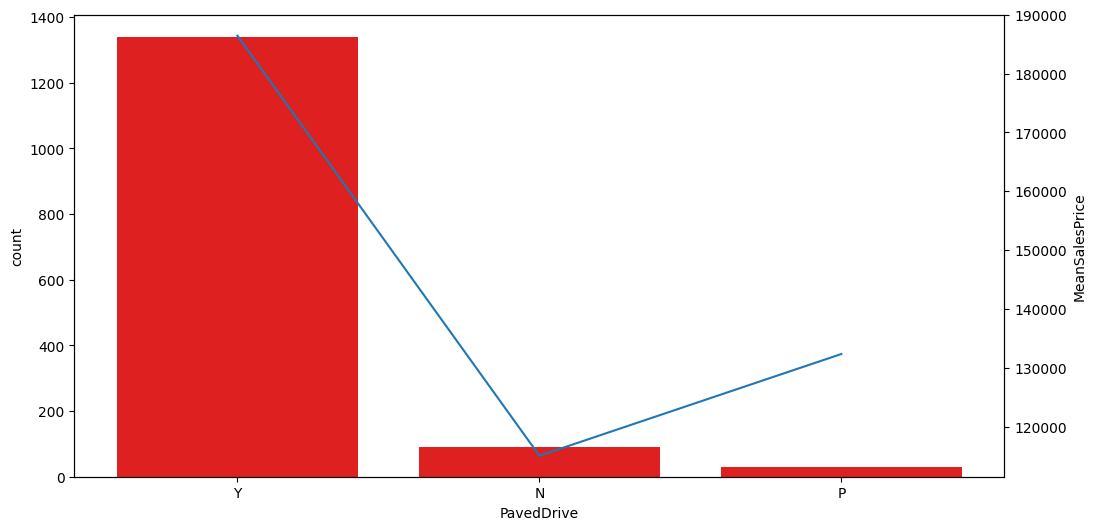

In [86]:
group = 'PavedDrive'
categorical_plot(df, group)

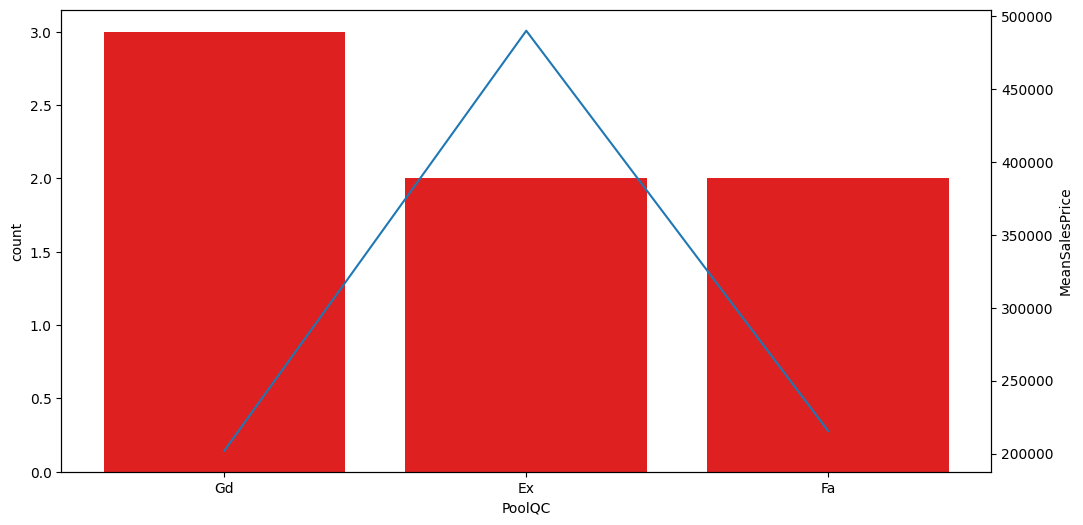

In [87]:
group = 'PoolQC'
categorical_plot(df, group)

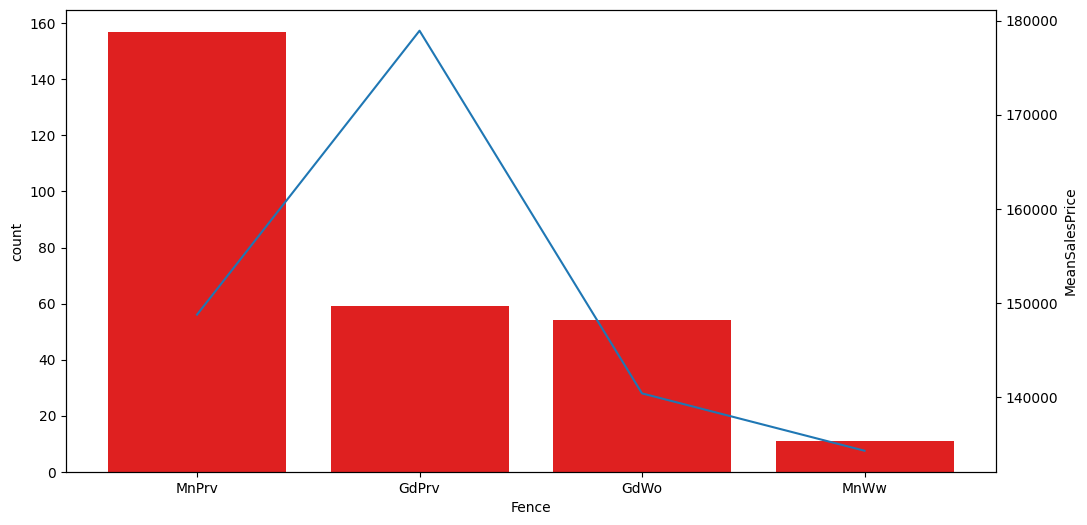

In [88]:
group = 'Fence'
categorical_plot(df, group)

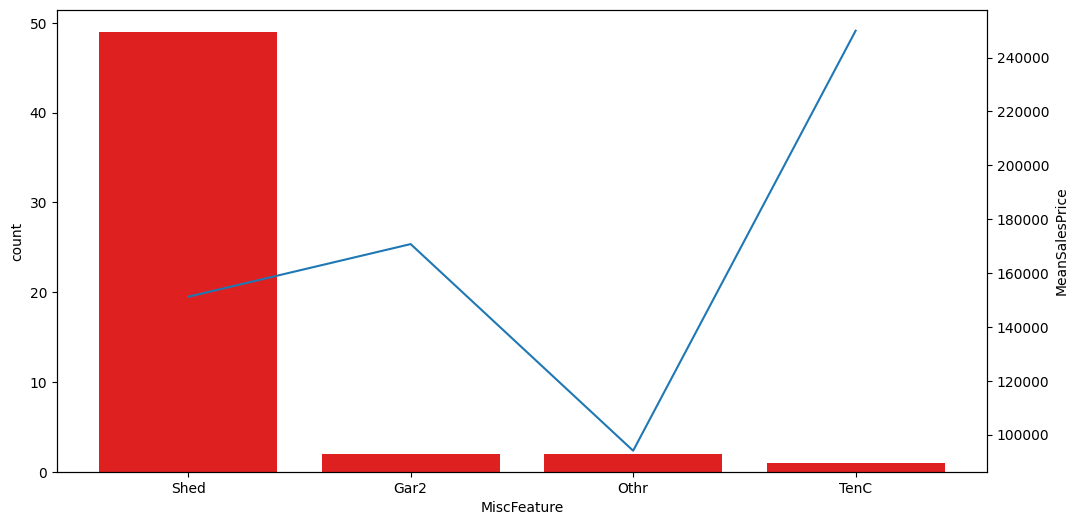

In [89]:
group = 'MiscFeature'
categorical_plot(df, group)

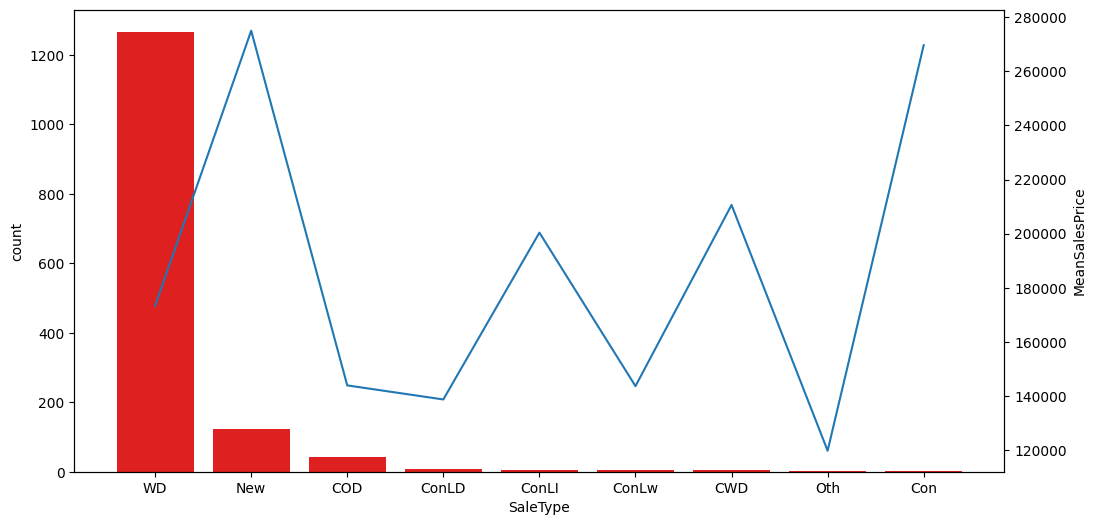

In [90]:
group = 'SaleType'
categorical_plot(df, group)

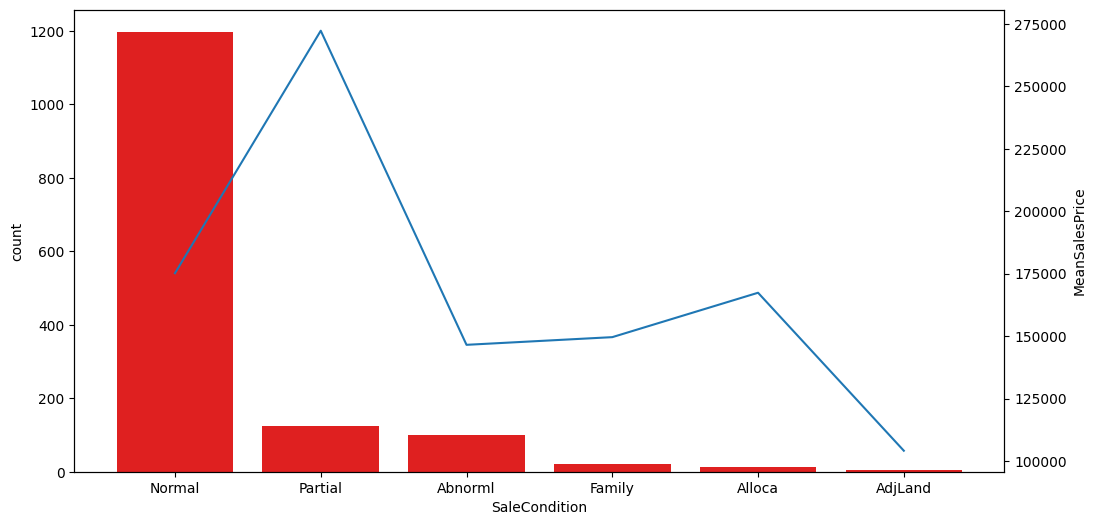

In [91]:
group = 'SaleCondition'
categorical_plot(df, group)

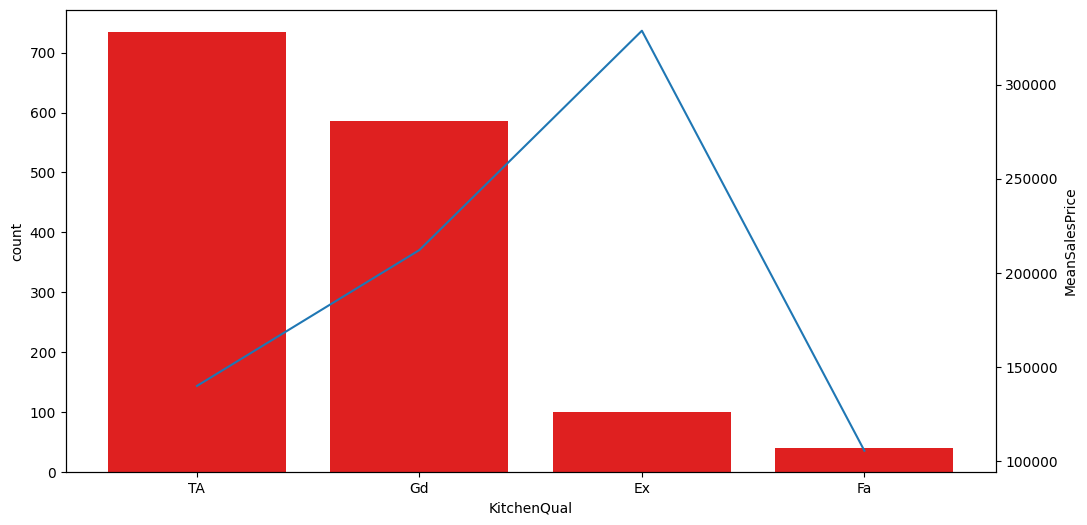

In [92]:
group = 'KitchenQual'
categorical_plot(df, group)

In [93]:
df.select_dtypes(include='object').columns

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

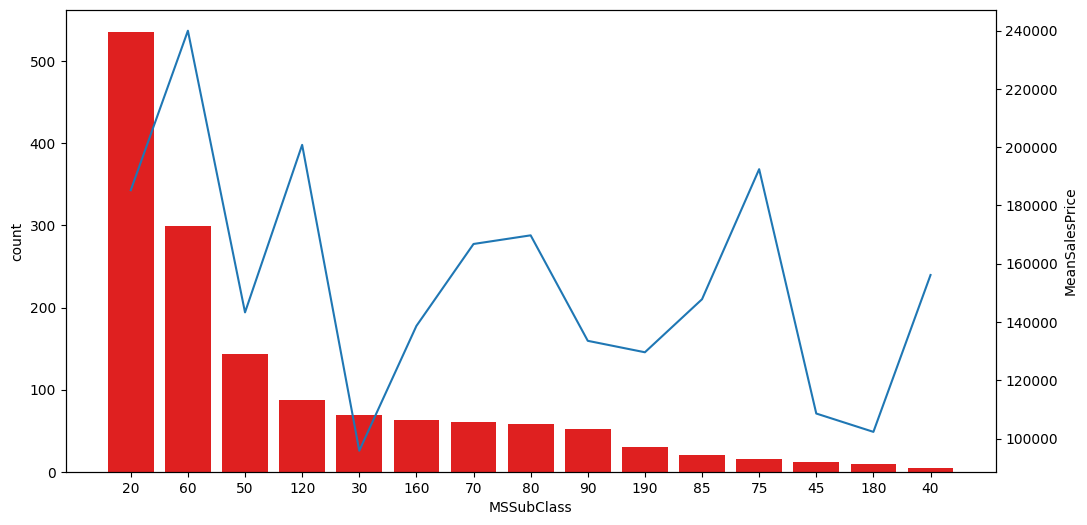

In [94]:
group = 'MSSubClass'
categorical_plot(df, group)

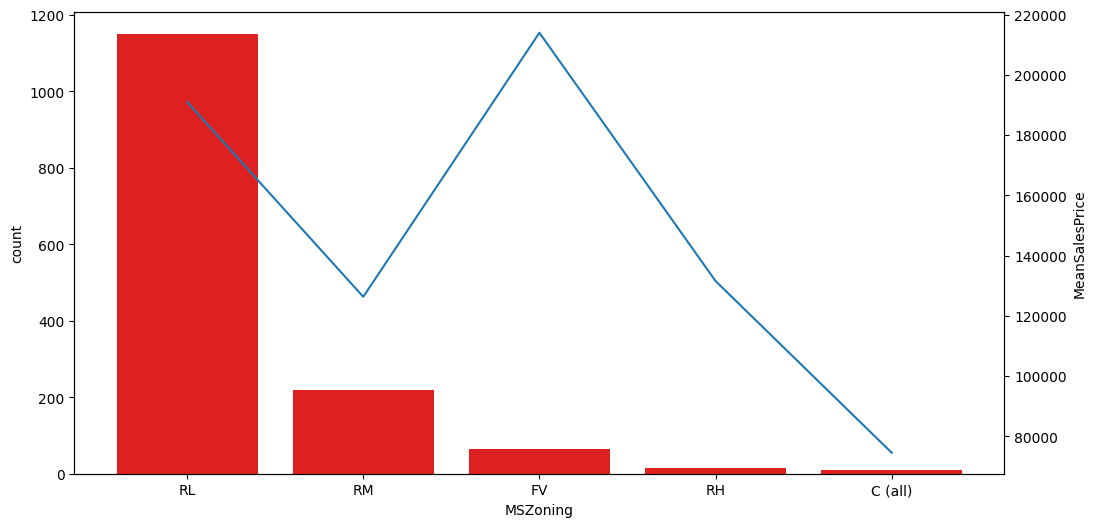

In [95]:
group = 'MSZoning'
categorical_plot(df, group)

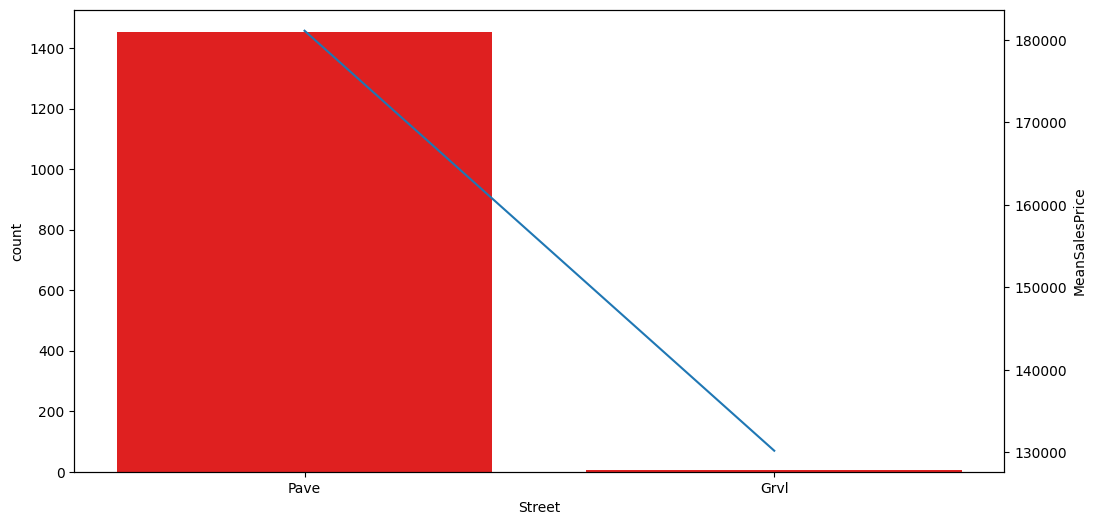

In [96]:
group = 'Street'
categorical_plot(df, group)

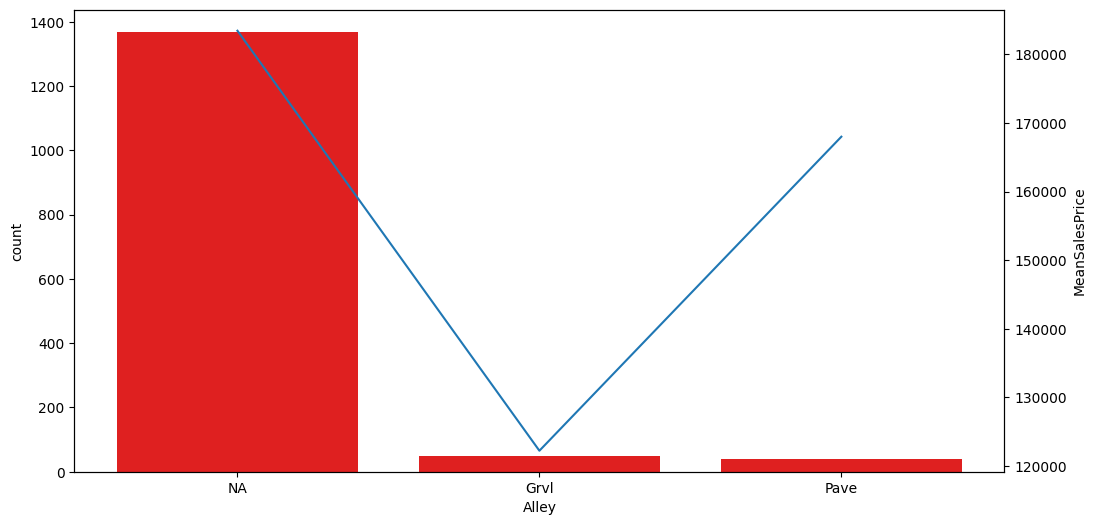

In [97]:
group = 'Alley'
categorical_plot(df, group)

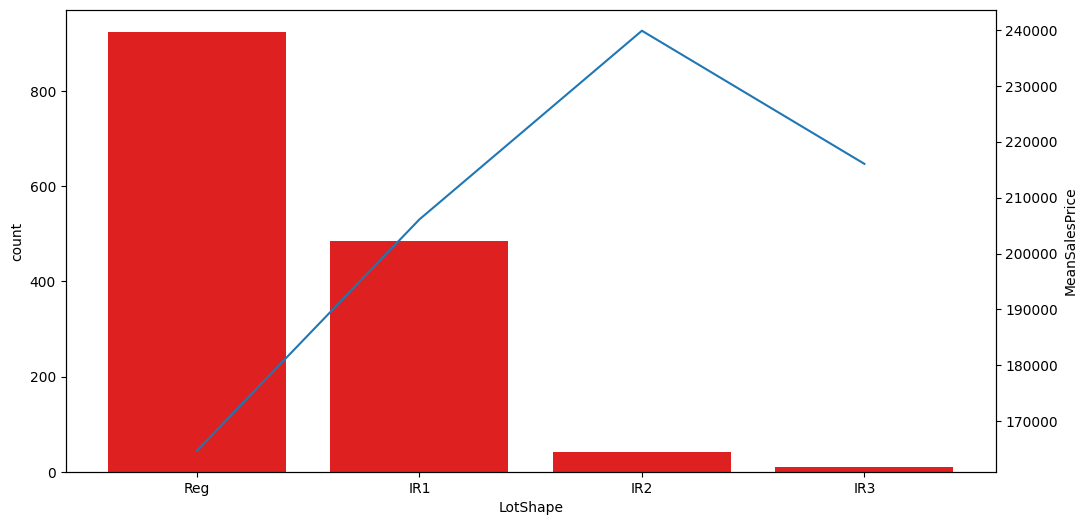

In [98]:
group = 'LotShape'
categorical_plot(df, group)

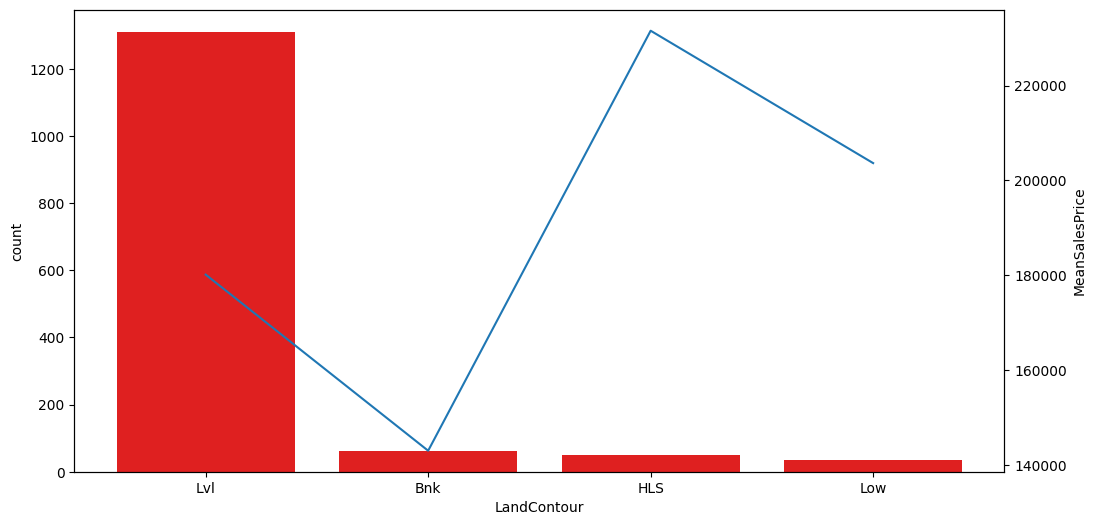

In [99]:
group = 'LandContour'
categorical_plot(df, group)

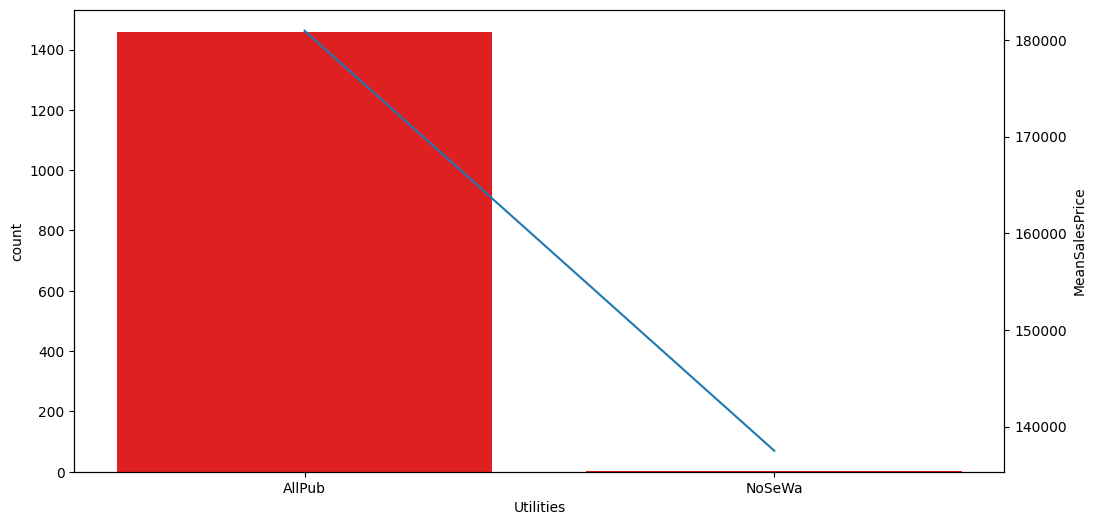

In [100]:
group = 'Utilities'
categorical_plot(df, group)

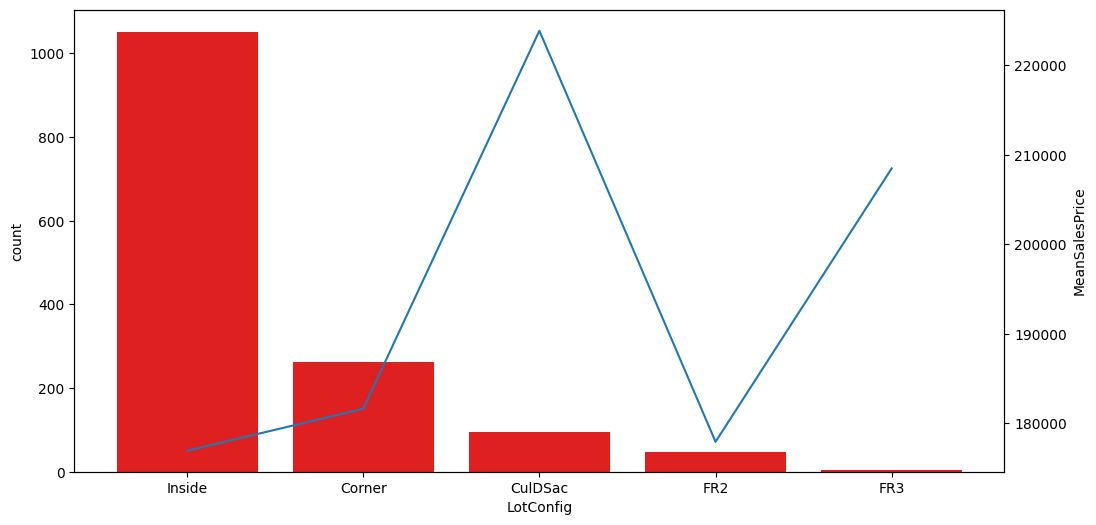

In [101]:
group = 'LotConfig'
categorical_plot(df, group)

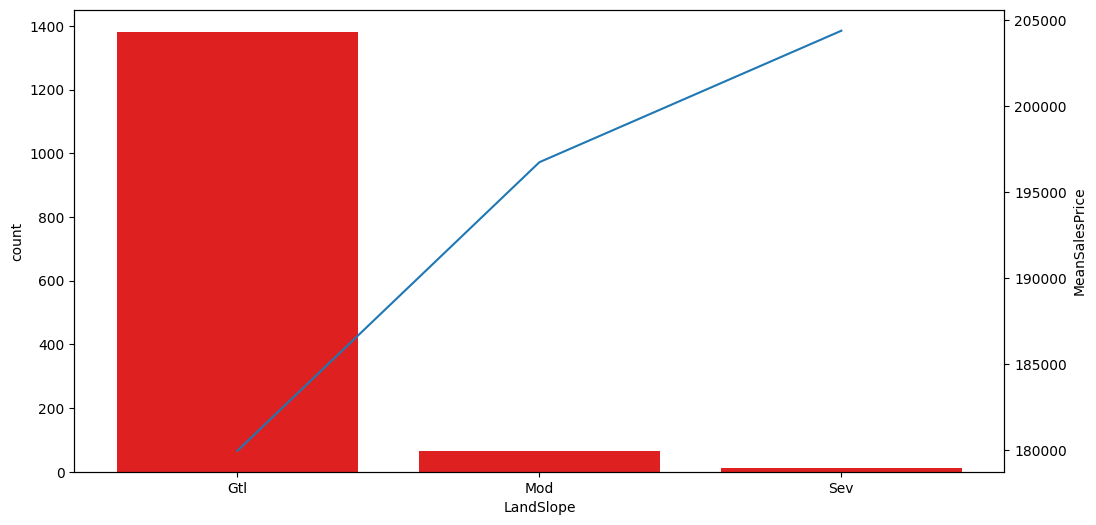

In [102]:
group = 'LandSlope'
categorical_plot(df, group)

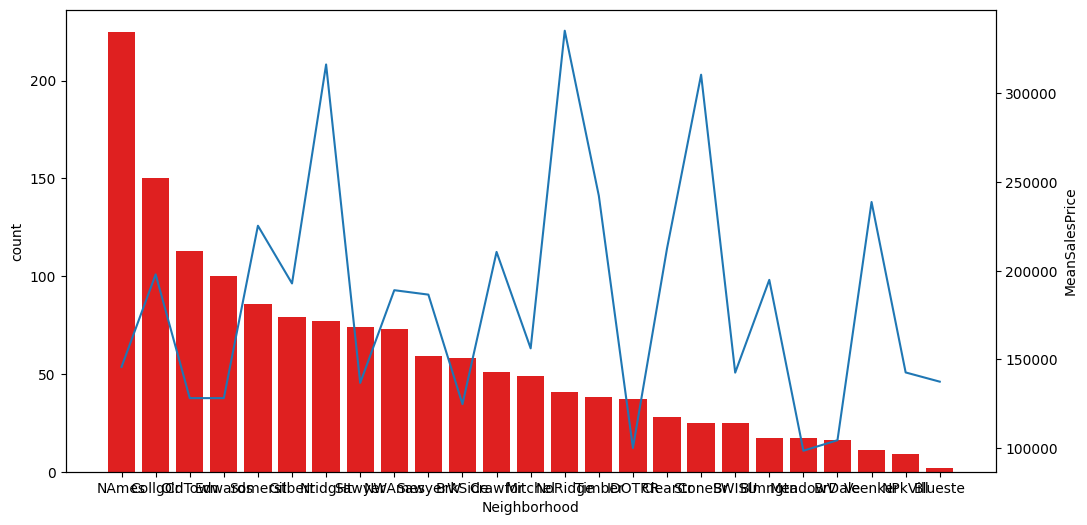

In [103]:
group = 'Neighborhood'
categorical_plot(df, group)

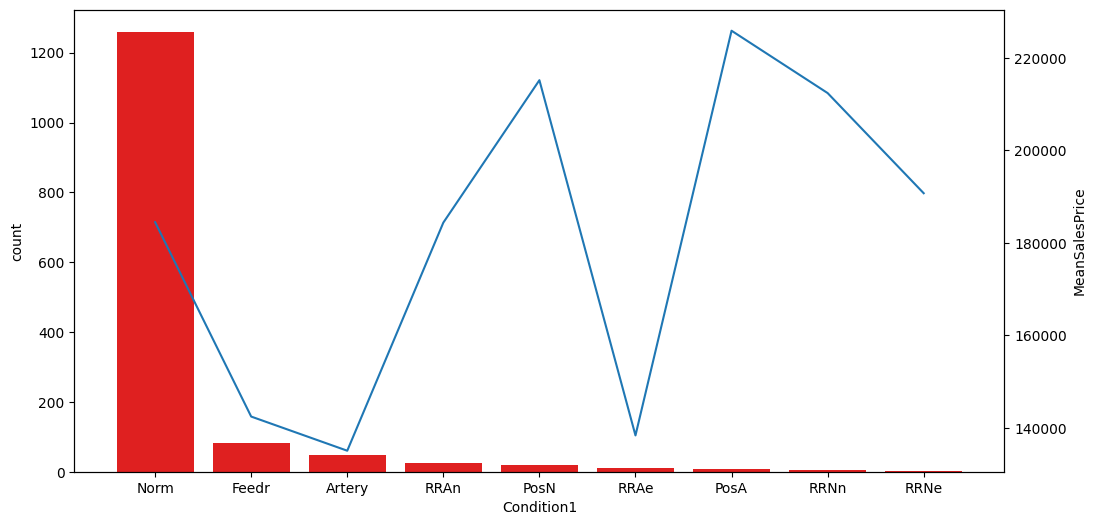

In [104]:
group = 'Condition1'
categorical_plot(df, group)

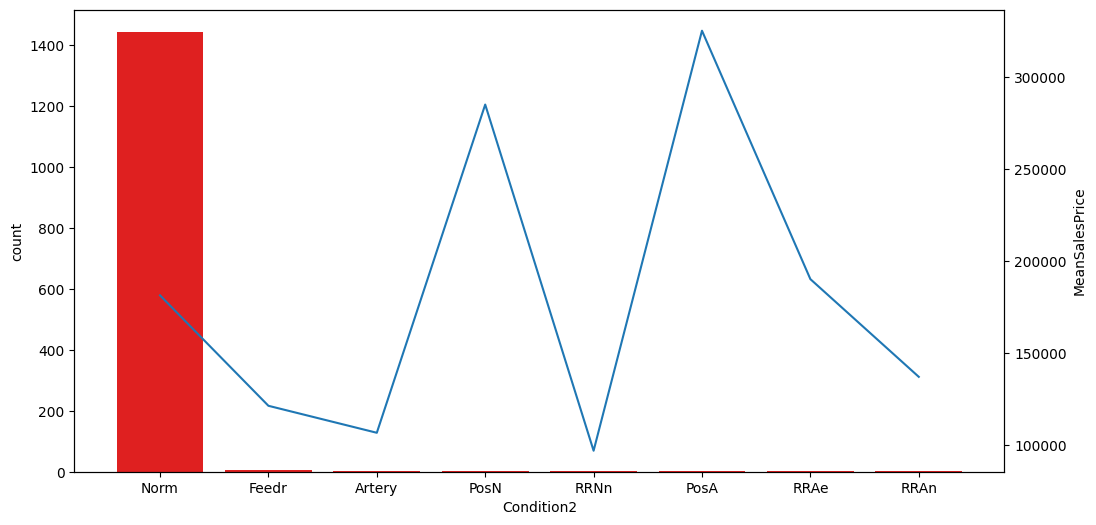

In [105]:
group = 'Condition2'
categorical_plot(df, group)

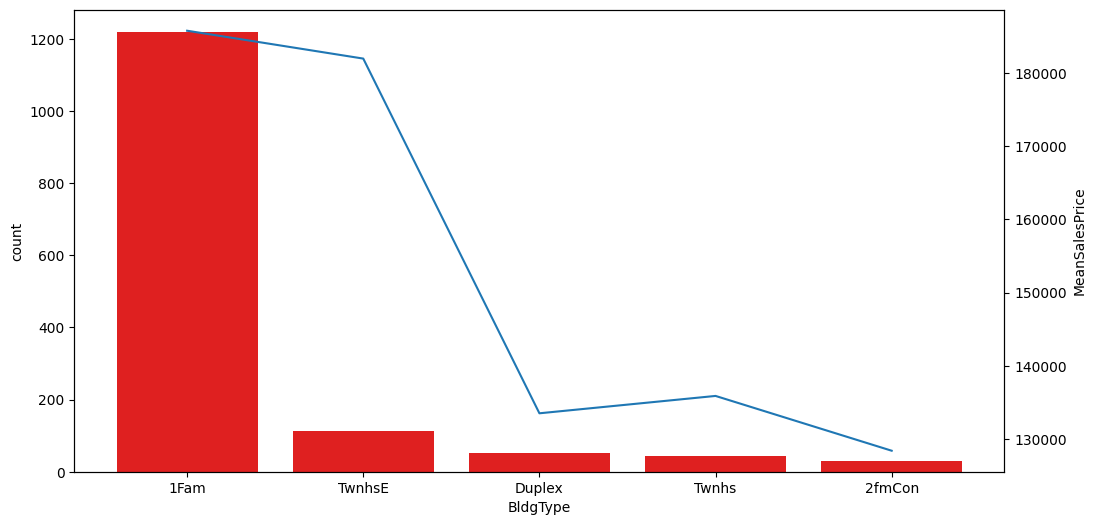

In [106]:
group = 'BldgType'
categorical_plot(df, group)

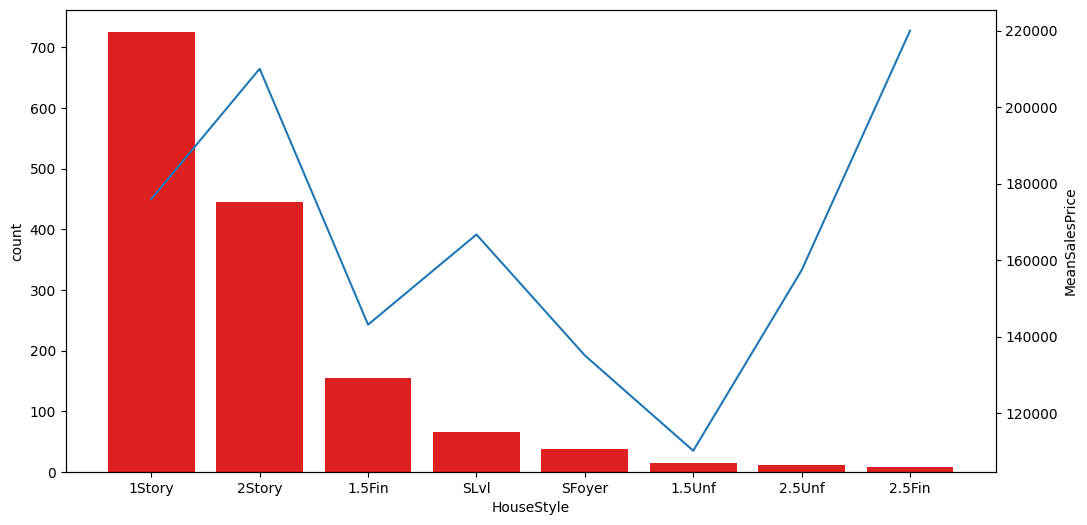

In [107]:
group = 'HouseStyle'
categorical_plot(df, group)

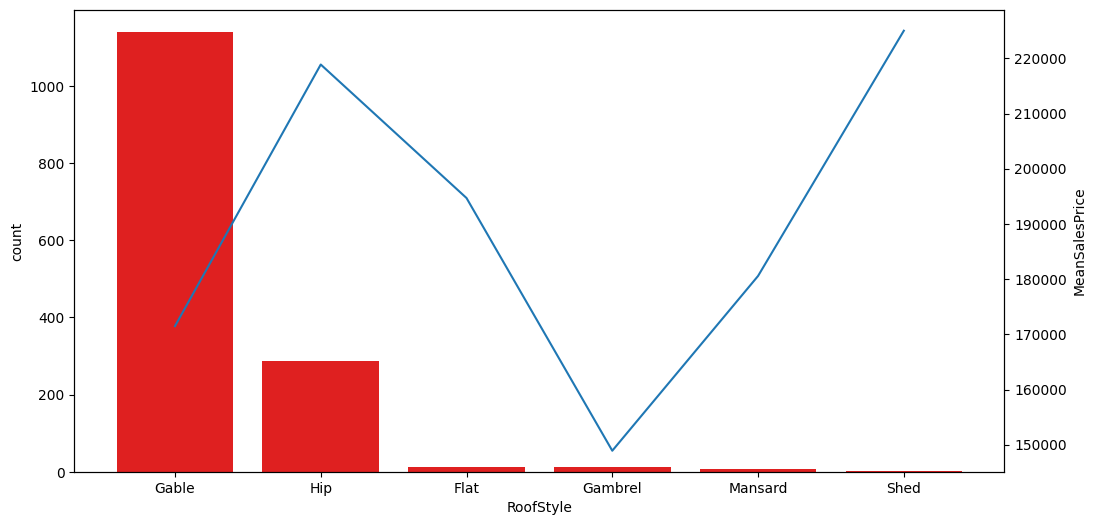

In [108]:
group = 'RoofStyle'
categorical_plot(df, group)

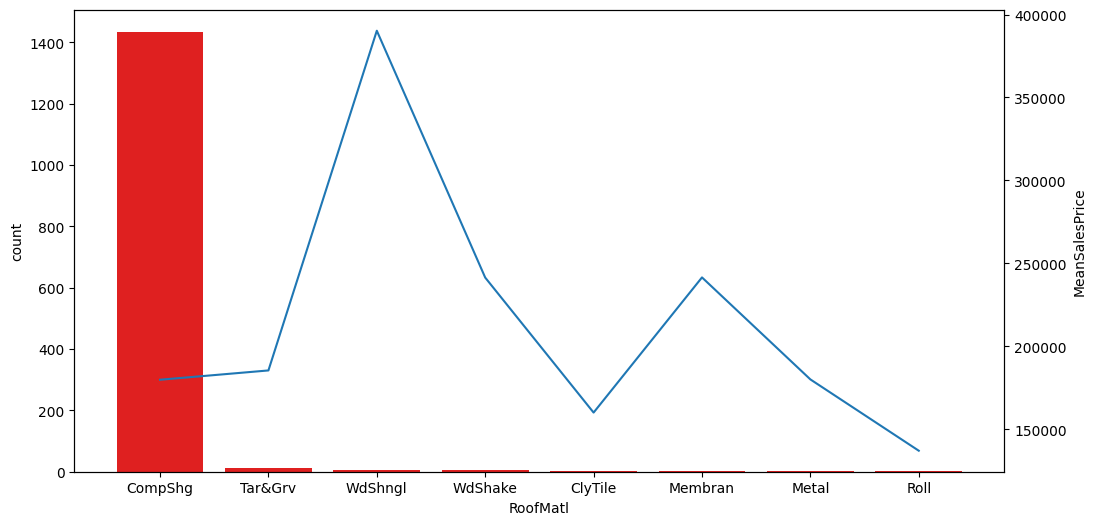

In [109]:
group = 'RoofMatl'
categorical_plot(df, group)

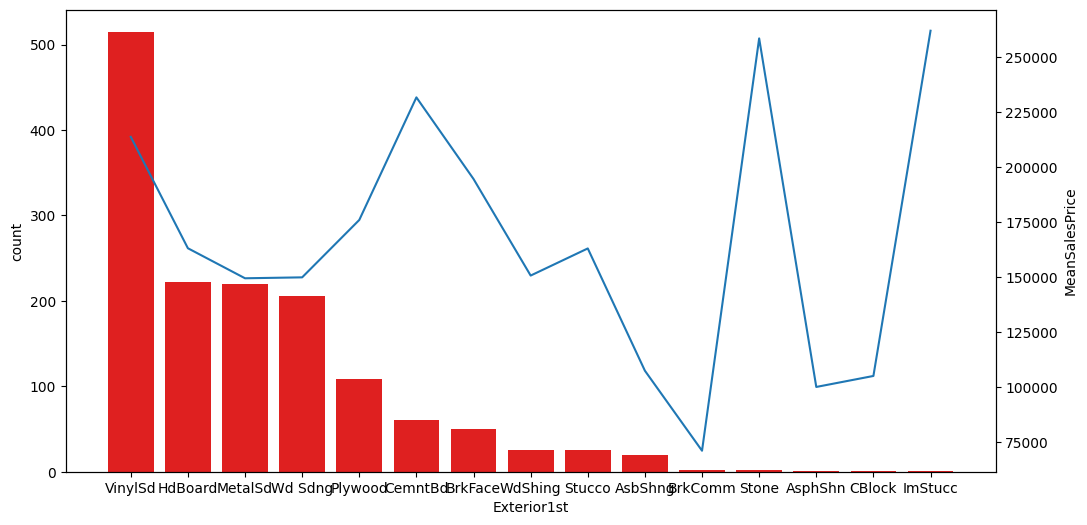

In [110]:
group = 'Exterior1st'
categorical_plot(df, group)

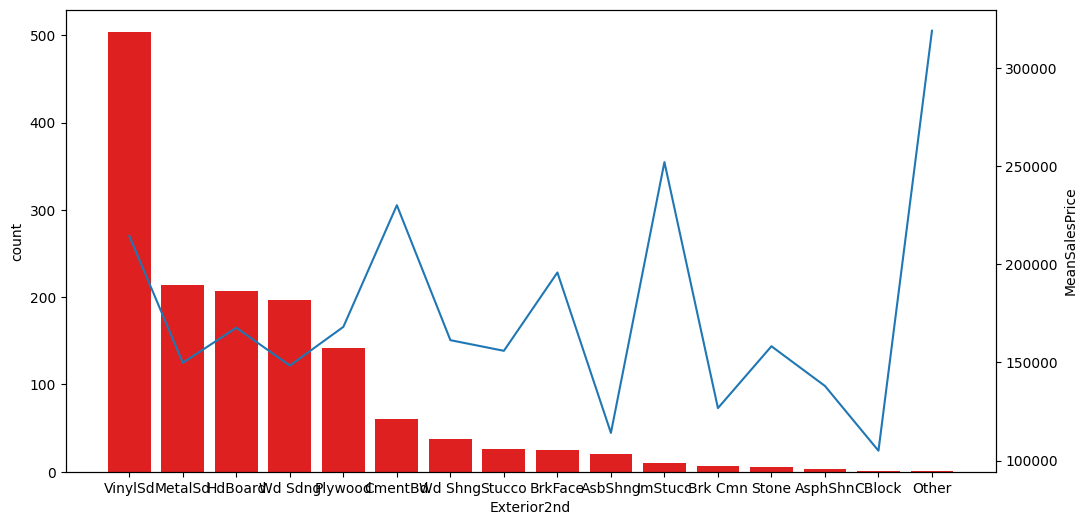

In [111]:
group = 'Exterior2nd'
categorical_plot(df, group)

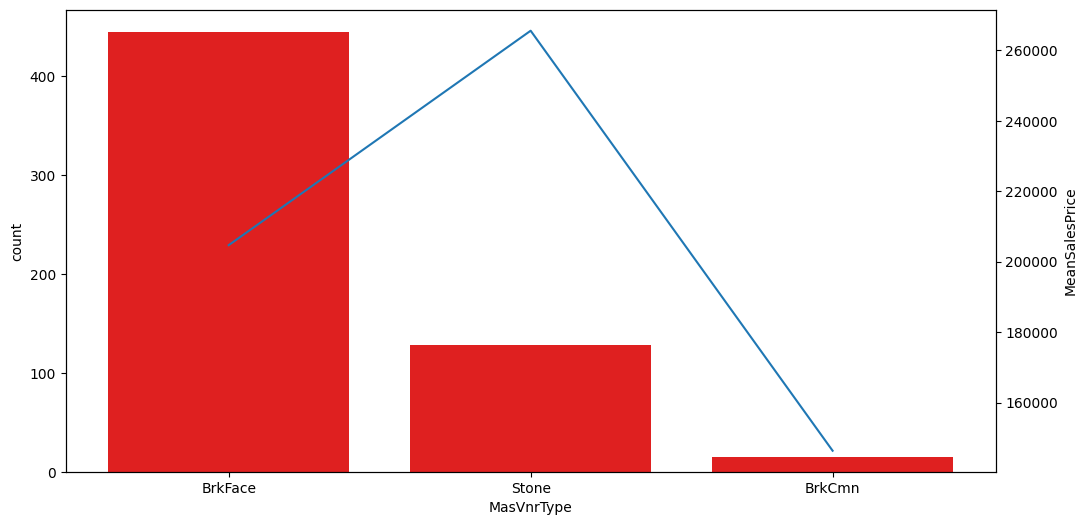

In [112]:
group = 'MasVnrType'
categorical_plot(df, group)

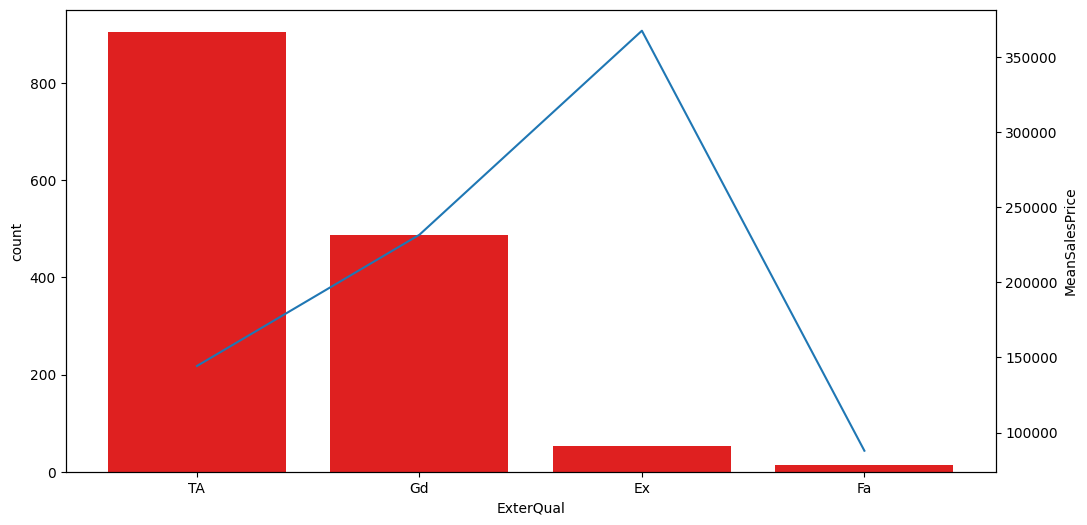

In [113]:
group = 'ExterQual'
categorical_plot(df, group)

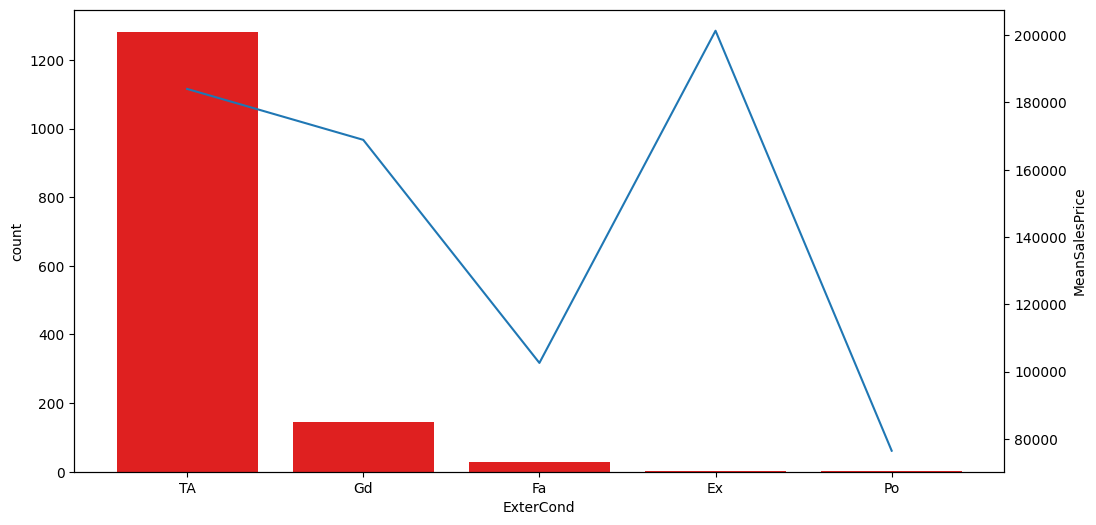

In [114]:
group = 'ExterCond'
categorical_plot(df, group)

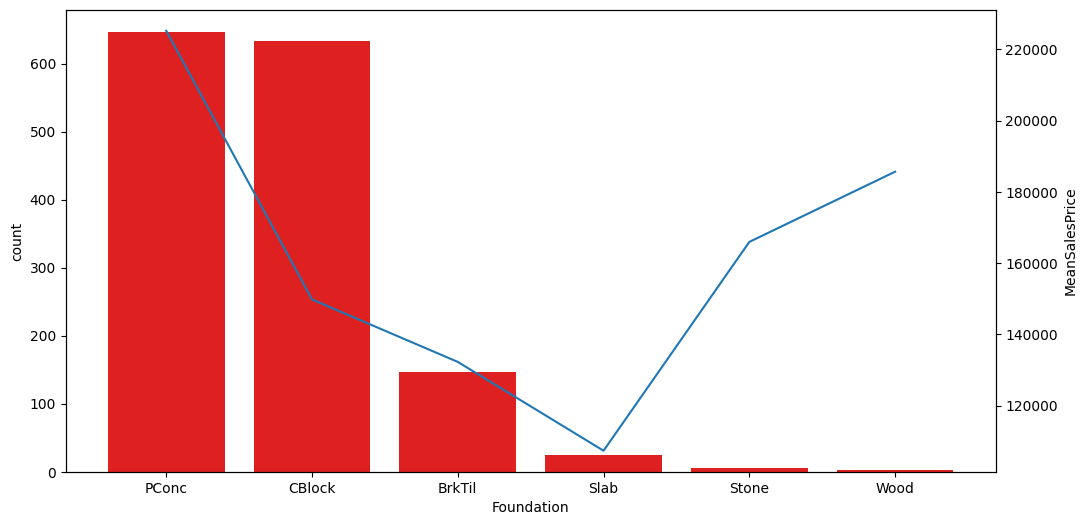

In [115]:
group = 'Foundation'
categorical_plot(df, group)

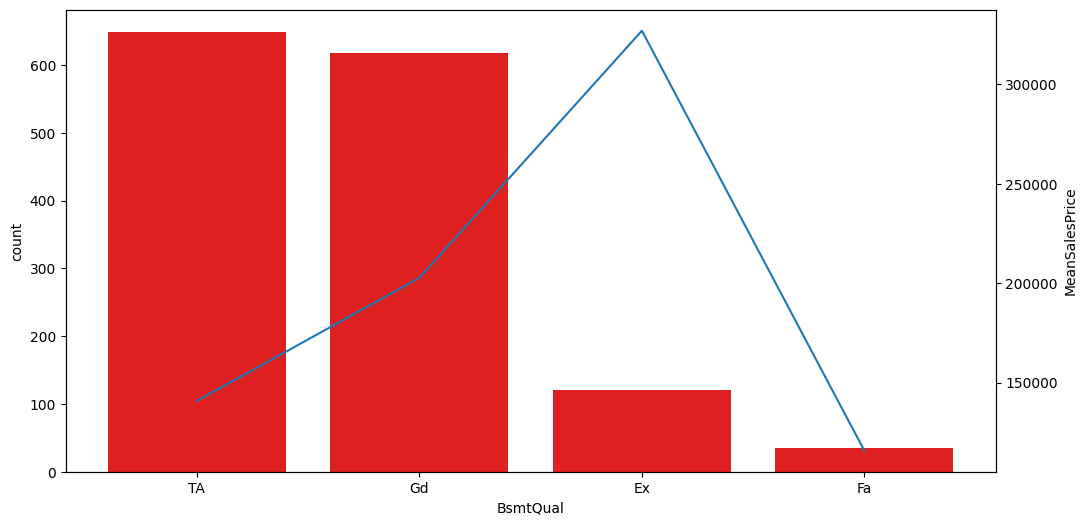

In [116]:
group = 'BsmtQual'
categorical_plot(df, group)

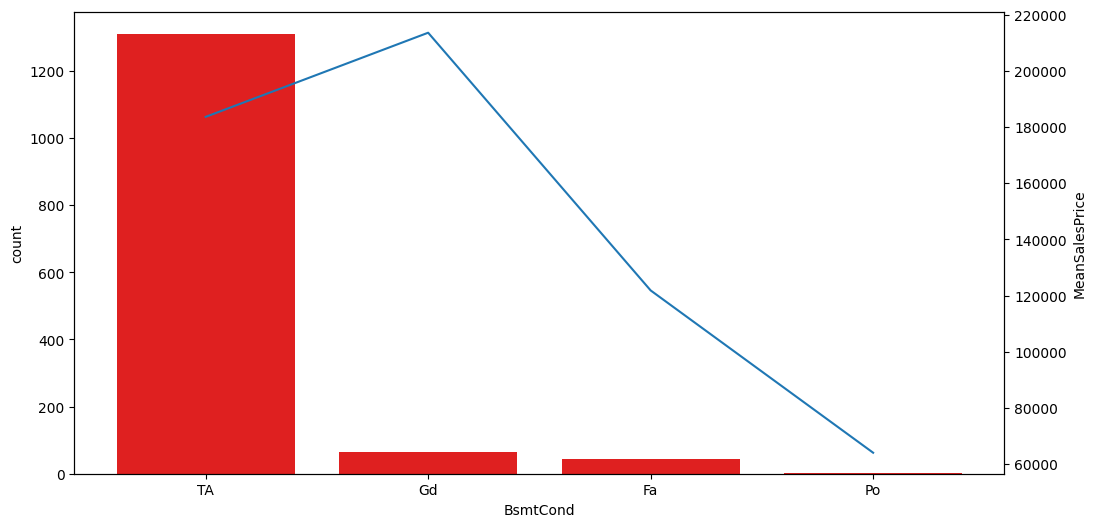

In [117]:
group = 'BsmtCond'
categorical_plot(df, group)

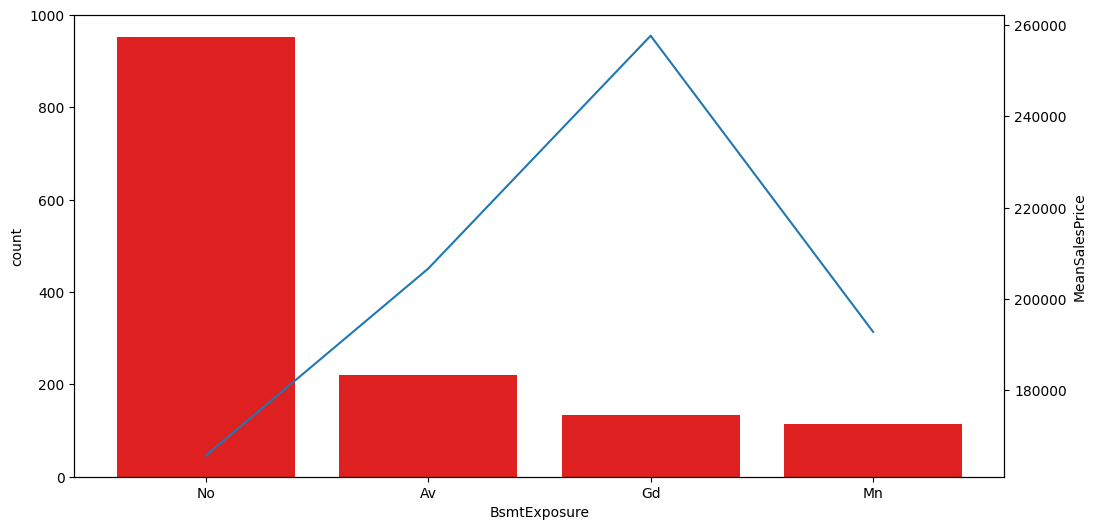

In [118]:
group = 'BsmtExposure'
categorical_plot(df, group)

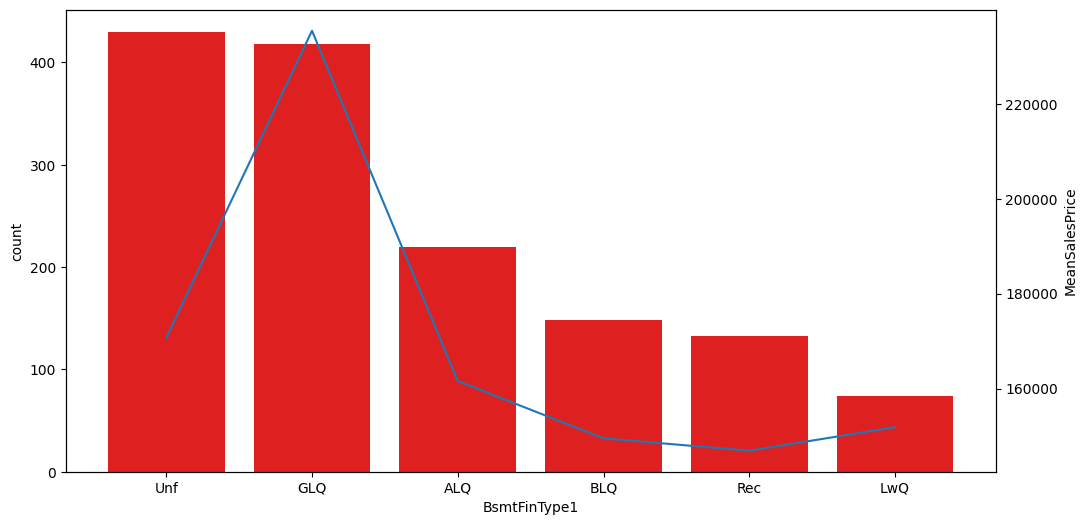

In [119]:
group = 'BsmtFinType1'
categorical_plot(df, group)

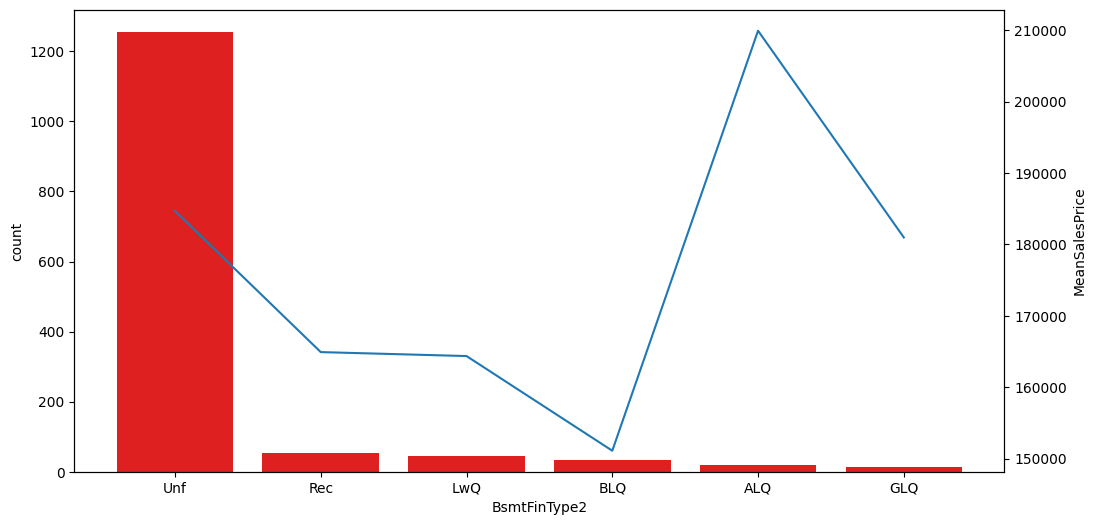

In [120]:
group = 'BsmtFinType2'
categorical_plot(df, group)

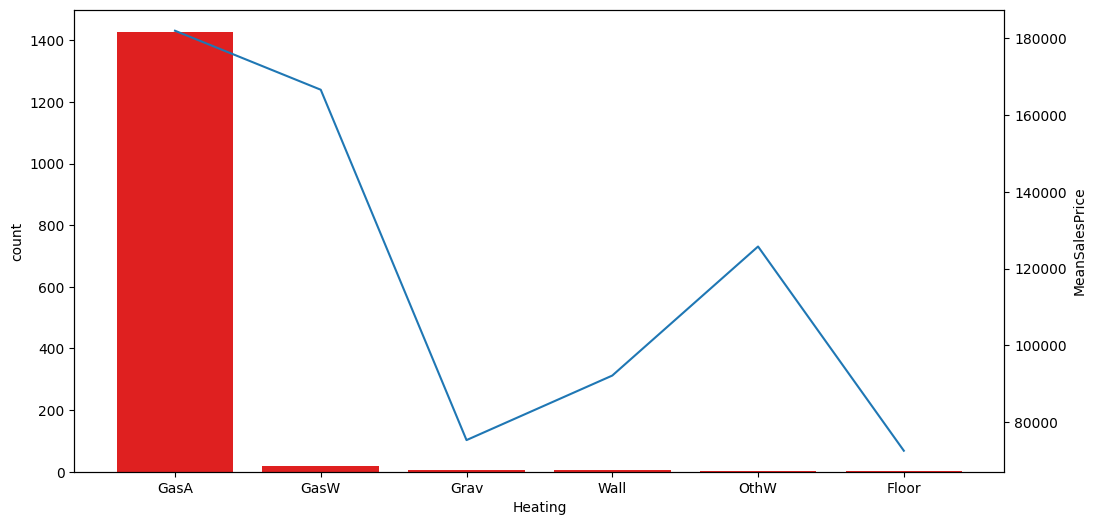

In [121]:
group = 'Heating'
categorical_plot(df, group)

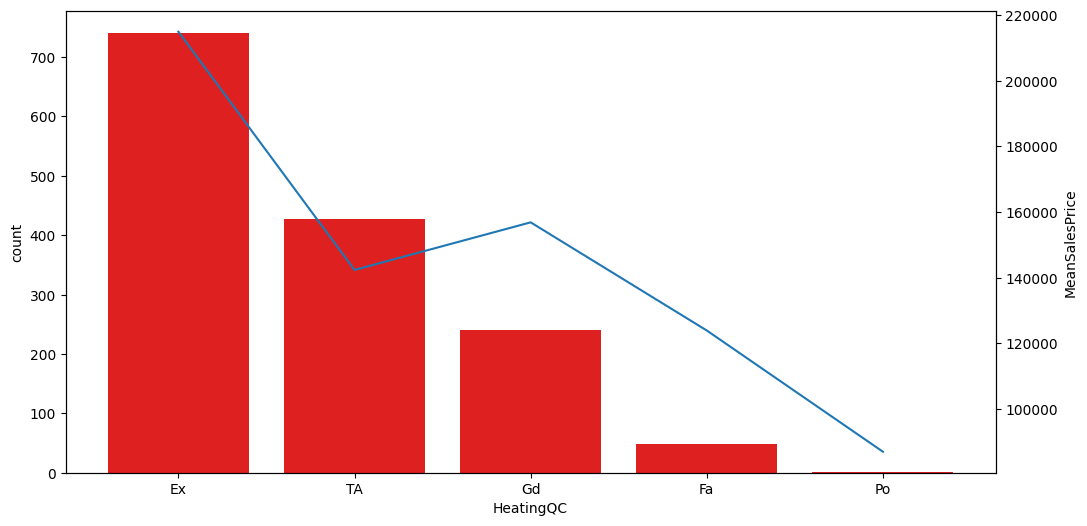

In [122]:
group = 'HeatingQC'
categorical_plot(df, group)

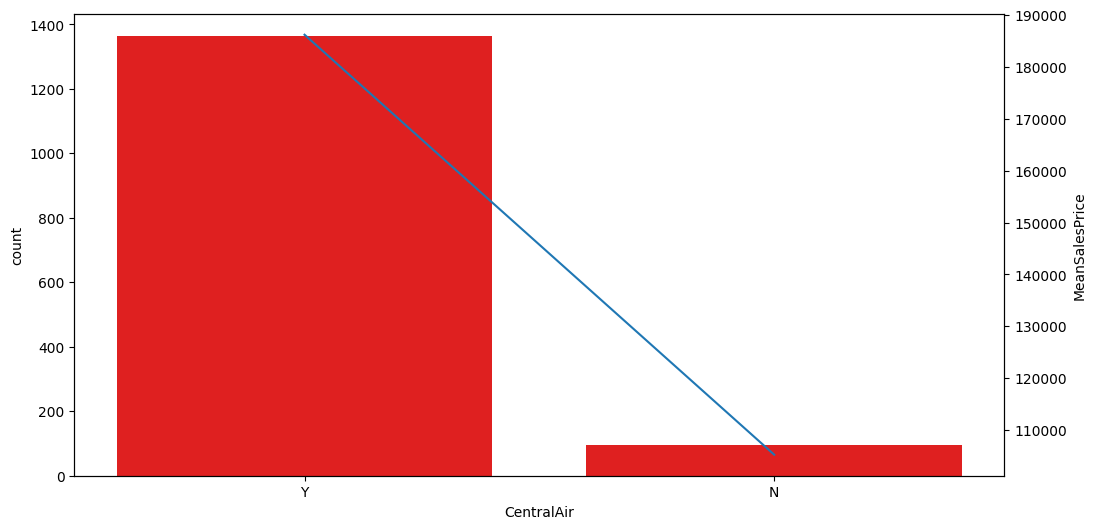

In [123]:
group = 'CentralAir'
categorical_plot(df, group)

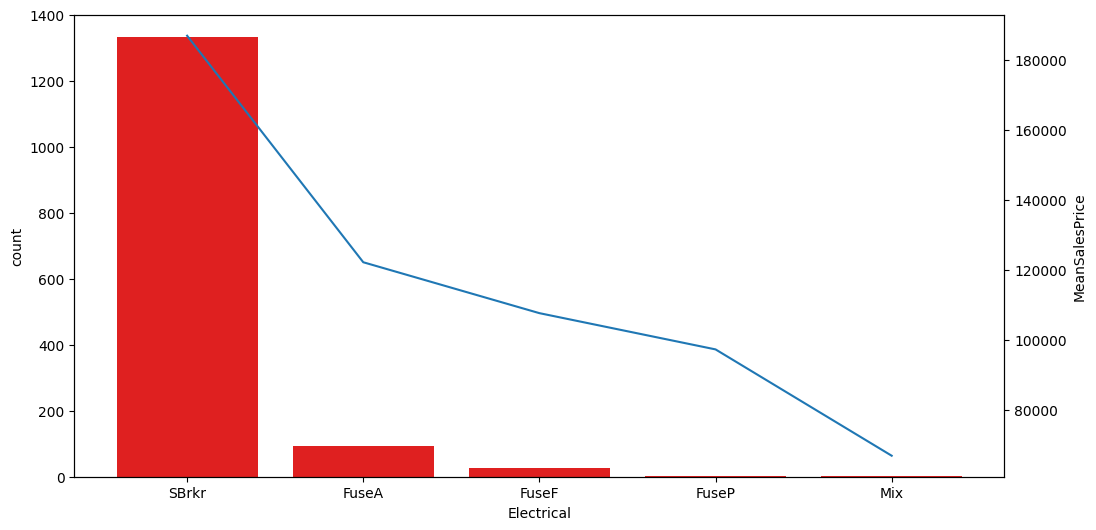

In [124]:
group = 'Electrical'
categorical_plot(df, group)